In [1]:
#include "TFile.h"
#include "TTree.h"
#include "TH1D.h"
#include "TH2D.h"

gStyle->SetOptStat(0);

In [2]:
// Get tree from file
// testing only
TFile *fin = new TFile("/uboone/app/users/kduffy/CC1pi/CC1pi_uboonecode/srcs/uboonecode/uboone/CC1pi/pionrecovalid_out.root","OPEN");

// MCC8:
//TFile *fin = new TFile("/uboone/data/users/kduffy/CC1pi/book/v06_26_01_13_PionReco_v1/pionrecovalid_merged.root","OPEN");
// MCC9 tag 0:
// BNB+Cosmics
//TFile *fin = new TFile("/uboone/data/users/kduffy/CC1piMCC9/book/v07_07_01_01_tag0_PionReco_v2/pionreco_mcc9_tag0_v2_merged.root","OPEN");
// MCC9 tag 1:
// BNB+Cosmics
//TFile *fin = new TFile("/uboone/data/users/kduffy/CC1piMCC9/book/v07_07_01_01_tag1_PionReco_v2/pionrecovalid_tag1_v2_merged.root","OPEN");
// MCC9 tag 2:
// BNB+Cosmics
//TFile *fin = new TFile("/uboone/data/users/kduffy/CC1piMCC9/book/v07_07_01_01_tag2_PionReco_v2/pionreco_mcc9_tag2_v2_merged.root","OPEN");

TTree *tr = (TTree*)fin->Get("pirecovalid/PiRecoTree");

//tr->Print();

double matchingthresh = 0.5;

// Variables to fill from tree
int PiPlusHierarchy_nMCPs;
std::vector<int> *PiPlusHierarchy_MCP_ID;
std::vector<int> *PiPlusHierarchy_MCP_MotherID;
std::vector<std::vector<int>> *PiPlusHierarchy_MCP_DaughterIDs;
std::vector<int> *PiPlusHierarchy_MCP_PDGcode;
std::vector<std::string> *PiPlusHierarchy_MCP_EndProcess;
std::vector<int> *PiPlusHierarchy_MCP_nMatchedPFPs;
std::vector<double> *PiPlusHierarchy_MCP_totaldepE;
std::vector<std::vector<int>> *PiPlusHierarchy_MCP_matchedPFP_ID;
std::vector<std::vector<double>> *PiPlusHierarchy_MCP_matchedPFP_matchedE;
std::vector<double> *PiPlusHierarchy_MCP_trueStartE;
std::vector<double> *PiPlusHierarchy_MCP_trueStartP;
std::vector<int> *PiPlusHierarchy_LogicalPion_MCPids;
int n_PFPs;
std::vector<int> *PFP_ID;
std::vector<int> *PFP_TrackShowerPdg;
std::vector<bool> *PFP_IsPrimary;
std::vector<std::pair<int,int>> *PFP_ID_to_bestmatchMCPid;
std::vector<double> *PFP_totaldepE;
std::vector<int> *PFP_primaryPFPid;
std::vector<bool> *PFP_isInNuSlice = nullptr;
std::vector<std::vector<std::vector<double>>> *PFP_spacepoints_XYZ;
std::vector<std::vector<std::vector<double>>> *PFP_trajpoints_XYZ;
std::vector<double> *PFP_track_length;
std::vector<std::vector<double>> *PFP_track_start;
std::vector<std::vector<double>> *PFP_track_end;

// Set branch addresses
tr->SetBranchAddress("PiPlusHierarchy_nMCPs",&PiPlusHierarchy_nMCPs);
tr->SetBranchAddress("PiPlusHierarchy_MCP_ID",&PiPlusHierarchy_MCP_ID);
tr->SetBranchAddress("PiPlusHierarchy_MCP_MotherID",&PiPlusHierarchy_MCP_MotherID);
tr->SetBranchAddress("PiPlusHierarchy_MCP_DaughterIDs",&PiPlusHierarchy_MCP_DaughterIDs);
tr->SetBranchAddress("PiPlusHierarchy_MCP_PDGcode",&PiPlusHierarchy_MCP_PDGcode);
tr->SetBranchAddress("PiPlusHierarchy_MCP_EndProcess",&PiPlusHierarchy_MCP_EndProcess);
tr->SetBranchAddress("PiPlusHierarchy_MCP_nMatchedPFPs",&PiPlusHierarchy_MCP_nMatchedPFPs);
tr->SetBranchAddress("PiPlusHierarchy_MCP_totaldepE",&PiPlusHierarchy_MCP_totaldepE);
tr->SetBranchAddress("PiPlusHierarchy_MCP_matchedPFP_ID",&PiPlusHierarchy_MCP_matchedPFP_ID);
tr->SetBranchAddress("PiPlusHierarchy_MCP_matchedPFP_matchedE",&PiPlusHierarchy_MCP_matchedPFP_matchedE);
tr->SetBranchAddress("PiPlusHierarchy_MCP_trueStartE",&PiPlusHierarchy_MCP_trueStartE);
tr->SetBranchAddress("PiPlusHierarchy_MCP_trueStartP",&PiPlusHierarchy_MCP_trueStartP);
tr->SetBranchAddress("PiPlusHierarchy_LogicalPion_MCPids",&PiPlusHierarchy_LogicalPion_MCPids);
tr->SetBranchAddress("n_PFPs",&n_PFPs);
tr->SetBranchAddress("PFP_ID",&PFP_ID);
tr->SetBranchAddress("PFP_TrackShowerPdg",&PFP_TrackShowerPdg);
tr->SetBranchAddress("PFP_IsPrimary",&PFP_IsPrimary);
tr->SetBranchAddress("PFP_ID_to_bestmatchMCPid",&PFP_ID_to_bestmatchMCPid);
tr->SetBranchAddress("PFP_totaldepE",&PFP_totaldepE);
tr->SetBranchAddress("PFP_primaryPFPid",&PFP_primaryPFPid);
tr->SetBranchAddress("PFP_isInNuSlice",&PFP_isInNuSlice);
tr->SetBranchAddress("PFP_spacepoints_XYZ",&PFP_spacepoints_XYZ);
tr->SetBranchAddress("PFP_trajpoints_XYZ",&PFP_trajpoints_XYZ);
tr->SetBranchAddress("PFP_track_length",&PFP_track_length);
tr->SetBranchAddress("PFP_track_start",&PFP_track_start);
tr->SetBranchAddress("PFP_track_end",&PFP_track_end);


Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for DBSCANAlgo.h
   requested to autoload type dbscan::DBSCANAlgo
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for DBSCAN.h
   requested to autoload type larcv::DBSCAN
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for NNCosine.h
   requested to autoload type larcv::NNCosine
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for ANNAlgo.h
   requested to autoload type ann::ANNAlgo
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for DatumFillerBase.h
   requested to autoload type larcv::DatumFillerBase
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for ExampleCircularBuffer.h
   requested to autoload type larcv::ExampleCircularBuffer
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry fo

Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for ConfigManager.h
   requested to autoload type larcv::Point2D
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for ConfigManager.h
   requested to autoload type larcv::logger
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for ConfigManager.h
   requested to autoload type larcv::larcv_base
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for ConfigManager.h
   requested to autoload type larcv::larbys
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for ConfigManager.h
   requested to autoload type larcv::PSet
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for ConfigManager.h
   requested to autoload type larcv::ConfigManager
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for UniqueR

In [3]:
// PDG code to useful PDG map
std::map<int,int> PDGCode_to_binno;
std::map<int,std::string> PDG_binno_to_label;

PDG_binno_to_label.insert(std::pair<int,std::string>(1,"#mu^{-}"));
PDGCode_to_binno.insert(std::pair<int,int>(13,1));
PDG_binno_to_label.insert(std::pair<int,std::string>(2,"#pi^{+}"));
PDGCode_to_binno.insert(std::pair<int,int>(211,2));
PDG_binno_to_label.insert(std::pair<int,std::string>(3,"p"));
PDGCode_to_binno.insert(std::pair<int,int>(2212,3));
PDG_binno_to_label.insert(std::pair<int,std::string>(4,"#mu^{+}"));
PDGCode_to_binno.insert(std::pair<int,int>(-13,4));
PDG_binno_to_label.insert(std::pair<int,std::string>(5,"#pi^{-}"));
PDGCode_to_binno.insert(std::pair<int,int>(-211,5));
PDG_binno_to_label.insert(std::pair<int,std::string>(6,"e^{-}"));
PDGCode_to_binno.insert(std::pair<int,int>(11,6));
PDG_binno_to_label.insert(std::pair<int,std::string>(7,"#gamma"));
PDGCode_to_binno.insert(std::pair<int,int>(22,7));
PDG_binno_to_label.insert(std::pair<int,std::string>(8,"other"));

int n_pdg_codes = 8;

// End process to bin number map
std::map<std::string,int> EndProc_to_binno;

EndProc_to_binno.insert(std::pair<std::string,int>("pi+Inelastic",1));
EndProc_to_binno.insert(std::pair<std::string,int>("Decay",2));
EndProc_to_binno.insert(std::pair<std::string,int>("FastScintillation",3));
EndProc_to_binno.insert(std::pair<std::string,int>("Other",4));


std::map<int,std::string> binno_to_EndProc;

binno_to_EndProc.insert(std::pair<int,std::string>(1,"pi+Inelastic"));
binno_to_EndProc.insert(std::pair<int,std::string>(2,"Decay"));
binno_to_EndProc.insert(std::pair<int,std::string>(3,"FastScintillation"));
binno_to_EndProc.insert(std::pair<int,std::string>(4,"Other"));

int n_endproc = 4;

In [4]:
// Function to make list of primary PFPs
// This is a nasty workaround because it turns out primary doesn't mean what I thought (it means "neutrino", whereas I wanted the first non-neutrino PFPs)
std::vector<int> GetAllPrimaryPFPIDs(std::vector<int> *PFP_primaryPFPid, std::vector<bool> *PFP_isInNuSlice, std::map<int,int> PFP_ID_to_vectorpos){
    std::vector<int> all_primary_PFP_IDs;
    
    for (int i=0; i<PFP_primaryPFPid->size(); i++){
        int primaryPFPID = PFP_primaryPFPid->at(i);
        // Check if we've seen this one before
        // If not, add it to the vector
        if (std::find(all_primary_PFP_IDs.begin(), all_primary_PFP_IDs.end(), primaryPFPID) != all_primary_PFP_IDs.end()){
            continue;
        }
        
        // Check that primary comes from neutrino slice, if it exists (i.e. if we're looking at Pandora consolidated output)
        // If not, don't keep this primary 
        int primary_idx = PFP_ID_to_vectorpos.find(primaryPFPID)->second;
        if (PFP_isInNuSlice && (!PFP_isInNuSlice->at(primary_idx))) continue;
    
        all_primary_PFP_IDs.push_back(primaryPFPID);
    }
    
    return all_primary_PFP_IDs;
}

In [5]:
// Histograms we want to fill

// --- 1D --- //
//   No true pi+ in logical pion
TH1D *h_nTruePiPlus = new TH1D("h_nTruePiPlus",";No. GEANT #pi^{+};Arb. units",5,0.5,5.5);
//   No mu+ or p daughters of logical pion
TH1D *h_nTruePiPlusmuDaughters = new TH1D("h_nTruePiPlusmuDaughters",";No. p or #mu^{+} daughters of true #pi^{+};Arb. units",10,-0.5,9.5);
//   No visible mu+ (what threshold) or p (trueP>300MeV) daughters of logical pion (what threshold?)
TH1D *h_nVisPiPlusmuDaughters = new TH1D("h_nVisPiPlusmuDaughters",";No. visible p or #mu^{+} daughters of true #pi^{+};Arb. units",10,-0.5,9.5);
//   No visible mu+ (what threshold) or p (trueP>300MeV) daughters of logical pion (what threshold?)
TH1D *h_nVisPiPlusmuppiDaughters = new TH1D("h_nVisPiPlusmuppiDaughters",";No. visible p, #pi^{+}, or #mu^{+} daughters of initial #pi^{+};Arb. units",10,-0.5,9.5);
//   pi+ frac matched E
TH1D *h_PiPlus_matchedEoverdepE = new TH1D("h_PiPlus_matchedEoverTotalE",";Matched E/True dep. E (true #pi^{+} only);Arb. units",100,0,1);
//   pi+ n matched PFPs
TH1D *h_PiPlus_nmatchedPFPs = new TH1D("h_PiPlus_nmatchedPFPs",";No. matched PFPs (all PFPs, true #pi^{+} only);Arb. units",5,-0.5,4.5);
//   pi+ n matched PFPs with matched E threshold
TString title = Form(";No. matched PFPs (matched E>%.2f #times PFP E, true #pi^{+} only);Arb. units",matchingthresh);
TH1D *h_PiPlus_nmatchedPFPs_thresh = new TH1D("h_PiPlus_nmatchedPFPs_thresh",title.Data(),5,-0.5,4.5);
//   hierarchy frac matched E
TH1D *h_hier_matchedEoverdepE = new TH1D("h_hier_matchedEoverTotalE",";Matched E/True dep. E (full #pi^{+} hierarchy);Arb. units",100,0,1);
//   hierarchy n matched PFPs
TH1D *h_hier_nmatchedPFPs = new TH1D("h_hier_nmatchedPFPs",";No. matched PFPs (all PFPs, full #pi^{+} hierarchy);Arb. units",5,-0.5,4.5);
//   hierarchy n matched PFPs with matched E threshold
title = Form(";No. matched PFPs (matched E>%.2f #times PFP E, full #pi^{+} hierarchy);Arb. units",matchingthresh);
TH1D *h_hier_nmatchedPFPs_thresh = new TH1D("h_hier_nmatchedPFPs_thresh",title.Data(),5,-0.5,4.5);
//   hierarchy best match PFP is in Hierarchy
TH1D *h_hier_goodmatch = new TH1D("h_hier_goodmatch",";Best match PFP in correct hierarchy?;Arb. units",2,-0.5,1.5);
//   MCC9: hierarchy best match PFP is in neutrino slice
TH1D *h_hier_PFPinnuslice = new TH1D("h_hier_PFPinnuslice",";Matched PFP (all matches) in neutrino slice?;Arb. units",2,-0.5,1.5);
//   MCC9: hierarchy best match PFP is in neutrino slice
TH1D *h_hier_PFPinnuslice_bestmatch = new TH1D("h_hier_PFPinnuslice_bestmatch",";Matched PFP (best match only) in neutrino slice?;Arb. units",2,-0.5,1.5);
//   hierarchy best match PDG for PFPs not in hierarchy
TH1D *h_hier_badmatch_pdgs = new TH1D("h_hier_badmatch_pdgs",";PDG for PFPs matched to wrong hierarchy;Arb. units",n_pdg_codes,0.5,(double)n_pdg_codes+0.5);
for (int i=0; i<n_pdg_codes; i++){
    h_hier_badmatch_pdgs->GetXaxis()->SetBinLabel(i+1,PDG_binno_to_label.find(i+1)->second.c_str());
}
//   Whether primary pi+ matched to primary PFP, or primary PFP matched elsewhere in chain, or not matched
TH1D *h_primarymatchinginfo = new TH1D("h_primarymatchinginfo",";Primary PFP (from best-match PFP hierarchy) matching result;Arb. units",3,-0.5,2.5);
h_primarymatchinginfo->GetXaxis()->SetBinLabel(1,"Matched to primary #pi^{+}");
h_primarymatchinginfo->GetXaxis()->SetBinLabel(2,"Matched to another #pi^{+}");
h_primarymatchinginfo->GetXaxis()->SetBinLabel(3,"Matched in #pi^{+} hierarchy");
//   PDG of primary PFP matched to chain
TH1D *h_primaryPFP_pdg = new TH1D("h_primaryPFP_pdg",";Primary PFP (from best-match PFP hierarchy) PDG;Arb. units",n_pdg_codes,0.5,(double)n_pdg_codes+0.5);
for (int i=0; i<n_pdg_codes; i++){
    h_primaryPFP_pdg->GetXaxis()->SetBinLabel(i+1,PDG_binno_to_label.find(i+1)->second.c_str());
}
//   Total matched energy of PFP hierarchy (from primary PFP) and MCP hierarchy frac MCP hierarchy energy
TH1D *h_hiermatchE_overMCP = new TH1D("h_hiermatchE_overMCP",";Full PFP-MCP matched E (over MCP dep. E);Arb. units",100,0,1);
//   Total matched energy of PFP hierarchy (from primary PFP) and MCP hierarchy frac PFP hierarchy energy
TH1D *h_hiermatchE_overPFP = new TH1D("h_hiermatchE_overPFP",";Full PFP-MCP matched E (over PFP E);Arb. units",100,0,1);
//   No PFPs in PFP hierarchy
TH1D *h_nPFPs_PFPhier = new TH1D("h_nPFPs_PFPhier",";No. PFPs in best-match PFP hierarchy;Arb. units",5,-0.5,4.5);
//   No PFPs truth-matched to pi+ in PFP hierarchy
TH1D *h_nPFPs_PFPhier_piplus = new TH1D("h_nPFPs_PFPhier_piplus",";No. PFPs in best-match PFP hierarchy matched to true #pi{+};Arb. units",5,-0.5,4.5);
//   No primary PFPs matched to this pi+ hierarchy
TH1D *h_nprimaryPFPmatch = new TH1D("h_nprimaryPFPmatch","Full #pi^{+} hierarchy;No. primary PFPs matched;Arb. units",5,-0.5,4.5);
TH1D *h_hiermatchE_overMCP_perprimary[3];
TH1D *h_hiermatchE_overPFP_perprimary[3];
for (int i=0; i<3; i++){
    TString name = Form("h_hiermatchE_overMCP_perprimary_%d",i);
    TString title2 = Form("PFP hierarchy %d (by matchedE/depE);Full PFP-MCP matched E (over MCP dep. E);Arb. units",i+1);
    h_hiermatchE_overMCP_perprimary[i] = new TH1D(name.Data(),title2.Data(),100,0,1);
    name = Form("h_hiermatchE_overPFP_perprimary_%d",i);
    title2 = Form("PFP hierarchy %d (by matchedE/depE);Full PFP-MCP matched E (over PFP E);Arb. units",i+1);
    h_hiermatchE_overPFP_perprimary[i] = new TH1D(name.Data(),title2.Data(),100,0,1);
}
TH1D *h_hier_primaryPFP_PFPtrackshower = new TH1D("h_hier_primaryPFP_PFPtrackshower","Full#pi^{+} hierarchy;PFP PDG;Arb. units",2,10.5,13.5);
h_hier_primaryPFP_PFPtrackshower->GetXaxis()->SetBinLabel(1,"Track");
h_hier_primaryPFP_PFPtrackshower->GetXaxis()->SetBinLabel(2,"Shower");


// --- 2D --- //
//   No true pi+ in logical pion vs true initial pi+ energy
TH2D *h_nTruePiPlus_vstrueE = new TH2D("h_nTruePiPlus_vstrueE",";No. GEANT #pi^{+};Initial #pi^{+} true energy",5,0.5,5.5,100,0,1);
//   pi+ frac matched E vs total dep E
TH2D *h_PiPlus_matchedE_vs_depE = new TH2D("h_PiPlus_matchedE_vs_depE","True #pi^{+} only;True dep. E;Total matched E",100,0,1000,100,0,1000);
//   pi+ total dep E vs true E
TH2D *h_PiPlus_depE_vs_trueE = new TH2D("h_PiPlus_depE_vs_trueE","True #pi^{+} only;True start #pi^{+} E;Total dep. E",100,0,1,100,0,1000);
//   pi+ n matched PFPs vs matched E
TH2D *h_PiPlus_nmatchedPFPs_vs_matchedE = new TH2D("h_PiPlus_nmatchedPFPs_vs_matchedE","True #pi^{+} only;Total matched E;No. matched PFPs",100,0,1000,5,-0.5,4.5);
//   pi+ n matched PFPs vs matched E/PFP E
TH2D *h_PiPlus_nmatchedPFPs_vs_matchedEfracPFP = new TH2D("h_PiPlus_nmatchedPFPs_vs_matchedEfracPFP","True #pi^{+} only;Total matched E/Total PFP E;No. matched PFPs",100,0,1,5,-0.5,4.5);
//   pi+ n matched PFPs vs matched E/MCP E
TH2D *h_PiPlus_nmatchedPFPs_vs_matchedEfracMCP = new TH2D("h_PiPlus_nmatchedPFPs_vs_matchedEfracMCP","True #pi^{+} only;Total matched E/Total MCP dep. E;No. matched PFPs",100,0,1,5,-0.5,4.5);
//   pi+ end process vs n proton daughters
TH2D *h_PiPlus_endproc_vs_np = new TH2D("h_PiPlus_endproc_vs_np","True #pi^{+} only;End process;No. p daughters (P>300MeV/c)",n_endproc,0,n_endproc,5,-0.5,4.5);
for (int i=0; i<n_endproc; i++){
    h_PiPlus_endproc_vs_np->GetXaxis()->SetBinLabel(i+1,binno_to_EndProc.find(i+1)->second.c_str());
}
//   pi+ end process vs n mu+ daughters
TH2D *h_PiPlus_endproc_vs_nmu = new TH2D("h_PiPlus_endproc_vs_nmu","True #pi^{+} only;End process;No. #mu^{+} daughters",n_endproc,0,n_endproc,5,-0.5,4.5);
for (int i=0; i<n_endproc; i++){
    h_PiPlus_endproc_vs_nmu->GetXaxis()->SetBinLabel(i+1,binno_to_EndProc.find(i+1)->second.c_str());
}
//   pi+ n matched PFPs vs matched E threshold
TH2D *h_PiPlus_nmatchedPFPs_thresh_2D = new TH2D("h_PiPlus_nmatchedPFPs_thresh_2D","True #pi^{+} only;No. matched PFPs; Threshold for matching (matched E/PFP E)",5,-0.5,4.5,10,0,1);
//   pi+ n matched PFPs vs matched E threshold, with low cut on depE
TH2D *h_PiPlus_nmatchedPFPs_thresh_2D_depEcut = new TH2D("h_PiPlus_nmatchedPFPs_thresh_2D_depEcut","True #pi^{+} only (dep. E > 0);No. matched PFPs; Threshold for matching (matched E/PFP E)",5,-0.5,4.5,10,0,1);
//   pi+ n matched PFPs vs matched E threshold (pandora nu slice only for MCC 9)
TH2D *h_PiPlus_nmatchedPFPs_thresh_2D_nuslc = new TH2D("h_PiPlus_nmatchedPFPs_thresh_2D_nuslc","True #pi^{+}, pandora #nu slice only;No. matched PFPs; Threshold for matching (matched E/PFP E)",5,-0.5,4.5,10,0,1);
//   hierarchy frac matched E vs total dep E
TH2D *h_hier_matchedE_vs_depE = new TH2D("h_hier_matchedE_vs_depE","Full #pi^{+} hierarchy;True dep. E;Total matched E",100,0,1000,100,0,1000);
//   hierarchy total dep E vs true E
TH2D *h_hier_depE_vs_trueE = new TH2D("h_hier_depE_vs_trueE","Full #pi^{+} hierarchy;True start #pi^{+} E;Total dep. E",100,0,1,100,0,1000);
//   hierarchy n matched PFPs vs matched E
TH2D *h_hier_nmatchedPFPs_vs_matchedE = new TH2D("h_hier_nmatchedPFPs_vs_matchedE","Full #pi^{+} hierarchy;Total matched E;No. matched PFPs",100,0,1000,5,-0.5,4.5);
//   hierarchy n matched PFPs vs matched E/PFP E
TH2D *h_hier_nmatchedPFPs_vs_matchedEfracPFP = new TH2D("h_hier_nmatchedPFPs_vs_matchedEfracPFP","Full #pi^{+} hierarchy;Total matched E/Total PFP E;No. matched PFPs",100,0,1,5,-0.5,4.5);
//   hierarchy n matched PFPs vs matched E/MCP E
TH2D *h_hier_nmatchedPFPs_vs_matchedEfracMCP = new TH2D("h_hier_nmatchedPFPs_vs_matchedEfracMCP","Full #pi^{+} hierarchy;Total matched E/Total MCP dep. E;No. matched PFPs",100,0,1,5,-0.5,4.5);
//   hierarchy matched PFP PDG vs matched PFP track/shower
TH2D *h_hier_PFPPDG_vs_PFPtrackshower = new TH2D("h_hier_PFPPDG_vs_PFPtrackshower","Full#pi^{+} hierarchy;True PDG;PFP PDG",n_pdg_codes,0.5,(double)n_pdg_codes+0.5,2,10.5,13.5);
for (int i=0; i<n_pdg_codes; i++){
    h_hier_PFPPDG_vs_PFPtrackshower->GetXaxis()->SetBinLabel(i+1,PDG_binno_to_label.find(i+1)->second.c_str());
}
//   hierarchy n matched PFPs vs matched E threshold
TH2D *h_hier_nmatchedPFPs_thresh_2D = new TH2D("h_hier_nmatchedPFPs_thresh_2D","Full #pi^{+} hierarchy;No. matched PFPs; Threshold for matching (matched E/PFP E)",5,-0.5,4.5,10,0,1);
//   PDG of primary PFP matched to chain vs initial pi+ true energy
TH2D *h_primaryPFP_pdg_vstrueE = new TH2D("h_primaryPFP_pdg_vstrueE",";Primary PFP (from best-match PFP hierarchy) PDG;Initial #pi^{+} true energy",n_pdg_codes,0.5,(double)n_pdg_codes+0.5,100,0,1);
for (int i=0; i<n_pdg_codes; i++){
    h_primaryPFP_pdg_vstrueE->GetXaxis()->SetBinLabel(i+1,PDG_binno_to_label.find(i+1)->second.c_str());
}
//   PDG of primary PFP matched to chain vs initial pi+ true energy
TH2D *h_primaryPFP_pdg_vsdepE = new TH2D("h_primaryPFP_pdg_vsdepE",";Primary PFP (from best-match PFP hierarchy) PDG;Total #pi^{+} deposited energy",n_pdg_codes,0.5,(double)n_pdg_codes+0.5,100,0,500);
for (int i=0; i<n_pdg_codes; i++){
    h_primaryPFP_pdg_vsdepE->GetXaxis()->SetBinLabel(i+1,PDG_binno_to_label.find(i+1)->second.c_str());
}

//   Whether primary pi+ matched to primary PFP, or primary PFP matched elsewhere in chain, or not matched (2D vs matched energy of PFP hierarchy)
TH2D *h_primarymatchinginfo_2D = new TH2D("h_primarymatchinginfo_2D",";Primary PFP matching result;PFP hierarchy ordered high-low matched E/total dep E",3,-0.5,2.5,5,0,5);
h_primarymatchinginfo_2D->GetXaxis()->SetBinLabel(1,"Matched to primary #pi^{+}");
h_primarymatchinginfo_2D->GetXaxis()->SetBinLabel(2,"Matched to another #pi^{+}");
h_primarymatchinginfo_2D->GetXaxis()->SetBinLabel(3,"Matched in #pi^{+} hierarchy");
//   PDG of primary PFP matched to chain
TH2D *h_primaryPFP_pdg_2D = new TH2D("h_primaryPFP_pdg_2D",";Primary PFP PDG;PFP hierarchy ordered high-low matched E/total dep E",n_pdg_codes,0.5,(double)n_pdg_codes+0.5,5,0,5);
for (int i=0; i<n_pdg_codes; i++){
    h_primaryPFP_pdg_2D->GetXaxis()->SetBinLabel(i+1,PDG_binno_to_label.find(i+1)->second.c_str());
}
//   Total matched energy of PFP hierarchy (from primary PFP) and MCP hierarchy frac PFP hierarchy energy
TH2D *h_hiermatchE_overPFP_2D = new TH2D("h_hiermatchE_overPFP_2D",";Full PFP-MCP matched E (over PFP E);PFP hierarchy ordered high-low matched E/total dep E",100,0,1,5,0,5);
//   Total matched energy of PFP hierarchy (from primary PFP) and MCP hierarchy frac MCP hierarchy energy
TH2D *h_hiermatchE_overMCP_2D = new TH2D("h_hiermatchE_overMCP_2D",";Full PFP-MCP matched E (over total dep. E from MCP);PFP hierarchy ordered high-low matched E/total dep E",100,0,1,5,0,5);
//   No PFPs in PFP hierarchy
TH2D *h_nPFPs_PFPhier_2D = new TH2D("h_nPFPs_PFPhier_2D",";No. PFPs in PFP hierarchy;PFP hierarchy ordered high-low matched E/total dep E",5,-0.5,4.5,5,0,5);
//   No PFPs truth-matched to pi+ in PFP hierarchy
TH2D *h_nPFPs_PFPhier_piplus_2D = new TH2D("h_nPFPs_PFPhier_piplus_2D",";No. PFPs in PFP hierarchy matched to true #pi{+};PFP hierarchy ordered high-low matched E/total dep E",5,-0.5,4.5,5,0,5);
//   Primary PFP is in neutrino slice? 2D by PFP hierarchy
TH2D *h_primaryPFP_isinnuslice_2D = new TH2D("h_primaryPFP_isinnuslice_2D",";Primary PFP is in neutrino slice?;PFP hierarchy ordered high-low matched E/total dep E",2,-0.5,1.5,5,0,5);


TGraph2D *spacepointsgr[20];
for (int i=0; i<20; i++){
    spacepointsgr[i] = new TGraph2D();
}

In [6]:
/*tr->GetEntry(0);

std::cout << "n_PFPs = " << n_PFPs << std::endl;
std::cout << "PFP_ID->size() = " << PFP_ID->size() << std::endl;
std::cout << "PFP_IsPrimary->size() = " << PFP_IsPrimary->size() << std::endl;
std::cout << "PFP_primaryPFPid->size() = " << PFP_primaryPFPid->size() << std::endl;
for (int i=0; i<n_PFPs; i++){
    std::cout << "[PFP " << i << "] PFP_ID = " << PFP_ID->at(i) << std::endl;
    std::cout << "        PFP_IsPrimary = " << PFP_IsPrimary->at(i) << std::endl;
    std::cout << "        PFP_primaryPFPid = " << PFP_primaryPFPid->at(i) << std::endl;
    std::cout << "        PFP_totaldepE = " << PFP_totaldepE->at(i) << std::endl;
}*/


In [7]:
// Clear histograms (need this if we want to make changes below and run again)
// --- 1D --- //
h_nTruePiPlus->Reset();
h_nTruePiPlusmuDaughters->Reset();
h_nVisPiPlusmuDaughters->Reset();
h_nVisPiPlusmuppiDaughters->Reset();
h_PiPlus_matchedEoverdepE->Reset();
h_PiPlus_nmatchedPFPs->Reset();
h_PiPlus_nmatchedPFPs_thresh->Reset();
h_hier_matchedEoverdepE->Reset();
h_hier_nmatchedPFPs->Reset();
h_hier_nmatchedPFPs_thresh->Reset();
h_hier_goodmatch->Reset();
h_hier_PFPinnuslice->Reset();
h_hier_PFPinnuslice_bestmatch->Reset();
h_hier_badmatch_pdgs->Reset();
h_primarymatchinginfo->Reset();
h_primaryPFP_pdg->Reset();
h_hiermatchE_overMCP->Reset();
h_hiermatchE_overPFP->Reset();
h_nPFPs_PFPhier->Reset();
h_nPFPs_PFPhier_piplus->Reset();
h_nprimaryPFPmatch->Reset();
for (int i=0; i<3; i++){
    h_hiermatchE_overMCP_perprimary[i]->Reset();
    h_hiermatchE_overPFP_perprimary[i]->Reset();
}
h_hier_primaryPFP_PFPtrackshower->Reset();
// --- 2D --- //
h_nTruePiPlus_vstrueE->Reset();
h_PiPlus_matchedE_vs_depE->Reset();
h_PiPlus_depE_vs_trueE->Reset();
h_PiPlus_nmatchedPFPs_vs_matchedE->Reset();
h_PiPlus_nmatchedPFPs_vs_matchedEfracPFP->Reset();
h_PiPlus_nmatchedPFPs_vs_matchedEfracMCP->Reset();
h_PiPlus_endproc_vs_np->Reset();
h_PiPlus_endproc_vs_nmu->Reset();
h_PiPlus_nmatchedPFPs_thresh_2D->Reset();
h_PiPlus_nmatchedPFPs_thresh_2D_depEcut->Reset();
h_PiPlus_nmatchedPFPs_thresh_2D_nuslc->Reset();
h_hier_matchedE_vs_depE->Reset();
h_hier_depE_vs_trueE->Reset();
h_hier_nmatchedPFPs_vs_matchedE->Reset();
h_hier_nmatchedPFPs_vs_matchedEfracPFP->Reset();
h_hier_nmatchedPFPs_vs_matchedEfracMCP->Reset();
h_hier_PFPPDG_vs_PFPtrackshower->Reset();
h_hier_nmatchedPFPs_thresh_2D->Reset();
h_primarymatchinginfo_2D->Reset();
h_primaryPFP_pdg_2D->Reset();
h_hiermatchE_overPFP_2D->Reset();
h_hiermatchE_overMCP_2D->Reset();
h_nPFPs_PFPhier_2D->Reset();
h_nPFPs_PFPhier_piplus_2D->Reset();
h_primaryPFP_pdg_vstrueE->Reset();
h_primaryPFP_pdg_vsdepE->Reset();



// This block fills the plots (and loops through tree)
for (int i_evt=0; i_evt<tr->GetEntries(); i_evt++){
    //std::cout << "Entry " << i_evt << std::endl;
    tr->GetEntry(i_evt);
    
    // Make some maps that will help us later 
    std::map<int,int> MCP_ID_to_vectorpos;
    for (int i_mcp=0; i_mcp<PiPlusHierarchy_nMCPs; i_mcp++){
        MCP_ID_to_vectorpos.insert(std::pair<int,int>(PiPlusHierarchy_MCP_ID->at(i_mcp), i_mcp));
    }
    std::map<int,int> PFP_ID_to_vectorpos;
    for (int i_pfp=0; i_pfp<n_PFPs; i_pfp++){
        PFP_ID_to_vectorpos.insert(std::pair<int,int>(PFP_ID->at(i_pfp),i_pfp));
    }
    
    // Truth selection: calculate total dep E from logical pion
    // If it's 0 (actually <1e-12), move on to the next pi+
    double pidepE = 0;
    for (int i_pi=0; i_pi<PiPlusHierarchy_LogicalPion_MCPids->size(); i_pi++){
        int pi_mcp = MCP_ID_to_vectorpos.find(PiPlusHierarchy_LogicalPion_MCPids->at(i_pi))->second;
        pidepE += PiPlusHierarchy_MCP_totaldepE->at(pi_mcp);
    }
    if (pidepE < 1e-12) continue;
    
    
    
    
    // --- Calculate variables relating to logical pion --- //
    
    // No. true pi+ in logical pion 
    h_nTruePiPlus->Fill(PiPlusHierarchy_LogicalPion_MCPids->size());
    h_nTruePiPlus_vstrueE->Fill(PiPlusHierarchy_LogicalPion_MCPids->size(),PiPlusHierarchy_MCP_trueStartE->at(0));
    
    // No mu+ or p daughters of logical pion
    int finalPi_MCPID = PiPlusHierarchy_LogicalPion_MCPids->at(PiPlusHierarchy_LogicalPion_MCPids->size()-1);
    int lp_endmcp = MCP_ID_to_vectorpos.find(finalPi_MCPID)->second;
    int n_p = 0;
    int n_mu = 0;
    int n_visp = 0;
    int n_vismu = 0;
    for (int i_d=0; i_d < PiPlusHierarchy_MCP_DaughterIDs->at(lp_endmcp).size(); i_d++){
        int daughter_mcp = MCP_ID_to_vectorpos.find(PiPlusHierarchy_MCP_DaughterIDs->at(lp_endmcp).at(i_d))->second;
        if (PiPlusHierarchy_MCP_PDGcode->at(daughter_mcp) == 2212){
            n_p++;
            if (PiPlusHierarchy_MCP_trueStartP->at(daughter_mcp) > 0.3) n_visp++;
        }
        else if (PiPlusHierarchy_MCP_PDGcode->at(daughter_mcp) == -13){
            n_mu++;
            n_vismu++; // no threshold on mu+ for now
        }
    }
    h_nTruePiPlusmuDaughters->Fill(n_p+n_mu);
    h_nVisPiPlusmuDaughters->Fill(n_visp+n_vismu);
    h_nVisPiPlusmuppiDaughters->Fill(n_visp+n_vismu+PiPlusHierarchy_LogicalPion_MCPids->size()-1);
        
    // End process of logical pion (we'll need this later)
    std::string lp_endproc = PiPlusHierarchy_MCP_EndProcess->at(lp_endmcp);
    int endproc_bin = n_endproc;
    auto search = EndProc_to_binno.find(lp_endproc);
    if (search != EndProc_to_binno.end()) endproc_bin = search->second;
    
    // deposited and matched E
    // n matched PFPs
    // n matched PFPs with threshold on matched E
    // ?n best-matched PFPs
    // total E of matched PFPs
    
    double pimatchE = 0;
    double pipfpE = 0;
    int pinpfps = 0;
    int pinpfps_thres = 0;
    
    std::vector<int> pi_seen_pfpids;
    std::vector<int> pi_seen_pfpids_thresh;
    
    for (int i_pi=0; i_pi<PiPlusHierarchy_LogicalPion_MCPids->size(); i_pi++){
        int pi_mcp = MCP_ID_to_vectorpos.find(PiPlusHierarchy_LogicalPion_MCPids->at(i_pi))->second;
        
        for (int i_matchpfp=0; i_matchpfp < PiPlusHierarchy_MCP_nMatchedPFPs->at(pi_mcp); i_matchpfp++){
            int pfpid = PiPlusHierarchy_MCP_matchedPFP_ID->at(pi_mcp).at(i_matchpfp);
            pimatchE += PiPlusHierarchy_MCP_matchedPFP_matchedE->at(pi_mcp).at(i_matchpfp);
            
            int pfp_idx = -1;
            auto search = PFP_ID_to_vectorpos.find(pfpid);
            if (search != PFP_ID_to_vectorpos.end()){
                pfp_idx = search->second;
            }
           
            
            if (std::find(pi_seen_pfpids.begin(), pi_seen_pfpids.end(), pfpid) == pi_seen_pfpids.end()){
                // If PFP has not been seen before
                pi_seen_pfpids.push_back(pfpid);
                pinpfps++;
                
                if (pfp_idx>=0) pipfpE += PFP_totaldepE->at(pfp_idx);
            } // end if PFP has not been seen before
            // Is it above threshold and hasn't been counted before?
            if (pfp_idx < 0) continue;
            if ((PiPlusHierarchy_MCP_matchedPFP_matchedE->at(pi_mcp).at(i_matchpfp) >= matchingthresh*PFP_totaldepE->at(pfp_idx)) && std::find(pi_seen_pfpids_thresh.begin(), pi_seen_pfpids_thresh.end(), pfpid) == pi_seen_pfpids_thresh.end()){
                pinpfps_thres++;
                pi_seen_pfpids_thresh.push_back(pfpid);
            }
        } // end loop over matched PFPs
    } // end loop over pions in logical pion
    
    
    // Fill 2D plot of number of matched PFPs as a function of matching threshold
    for (double thresh=0; thresh<1; thresh+=0.1){
        std::vector<int> pi_seen_pfpids_varthresh;
        int pinpfps_varthres = 0;
        int pinpfps_nuslc_varthres = 0;
    
        for (int i_pi=0; i_pi<PiPlusHierarchy_LogicalPion_MCPids->size(); i_pi++){
            int pi_mcp = MCP_ID_to_vectorpos.find(PiPlusHierarchy_LogicalPion_MCPids->at(i_pi))->second;
            
        
            for (int i_matchpfp=0; i_matchpfp < PiPlusHierarchy_MCP_nMatchedPFPs->at(pi_mcp); i_matchpfp++){
                int pfpid = PiPlusHierarchy_MCP_matchedPFP_ID->at(pi_mcp).at(i_matchpfp);

                int pfp_idx = -1;
                auto search = PFP_ID_to_vectorpos.find(pfpid);
                if (search != PFP_ID_to_vectorpos.end()){
                    pfp_idx = search->second;
                }
            
                // Is it above threshold and hasn't been counted before?
                if (pfp_idx<0) continue;
                if ((PiPlusHierarchy_MCP_matchedPFP_matchedE->at(pi_mcp).at(i_matchpfp) >= thresh*PFP_totaldepE->at(pfp_idx)) && std::find(pi_seen_pfpids_varthresh.begin(), pi_seen_pfpids_varthresh.end(), pfpid) == pi_seen_pfpids_varthresh.end()){
                    pinpfps_varthres++;
                    if (PFP_isInNuSlice && PFP_isInNuSlice->at(pfp_idx)) pinpfps_nuslc_varthres++;
                    pi_seen_pfpids_varthresh.push_back(pfpid);
                }
            } // end loop over matched PFPs
        } // end loop over pions in logical pion
        h_PiPlus_nmatchedPFPs_thresh_2D->Fill(pinpfps_varthres,thresh+0.05);
        if (PFP_isInNuSlice) h_PiPlus_nmatchedPFPs_thresh_2D_nuslc->Fill(pinpfps_nuslc_varthres,thresh+0.05);
    } // end loop over thresholds
    
    // Fill remaining plots relating to logical pion
    h_PiPlus_matchedEoverdepE->Fill(pimatchE/pidepE);
    h_PiPlus_nmatchedPFPs->Fill(pinpfps);
    h_PiPlus_nmatchedPFPs_thresh->Fill(pinpfps_thres);
    h_PiPlus_matchedE_vs_depE->Fill(pidepE,pimatchE);
    h_PiPlus_depE_vs_trueE->Fill(PiPlusHierarchy_MCP_trueStartE->at(0),pidepE);
    h_PiPlus_nmatchedPFPs_vs_matchedE->Fill(pimatchE,pinpfps);
    h_PiPlus_nmatchedPFPs_vs_matchedEfracPFP->Fill(pimatchE/pipfpE,pinpfps);
    h_PiPlus_nmatchedPFPs_vs_matchedEfracMCP->Fill(pimatchE/pidepE,pinpfps);
    h_PiPlus_endproc_vs_np->Fill(endproc_bin-0.5,n_p);
    h_PiPlus_endproc_vs_nmu->Fill(endproc_bin-0.5,n_mu);
    
    
    
    
    
    //std::cout << "Moving on to look at full pion hierarchy" << std::endl;
    
    // --- Calculate variables relating to full pion hierarchy --- //
    
    // total dep E
    // total matched E
    // n matched PFPs
    // n matched PFPs above some threshold
    // whether best-match PFP true MCP is in this hierarchy 
    // PFP best-match PDG
    // PFP track/shower PDG
    
    double totdepE = 0;
    double totmatchE = 0;
    double totpfpE = 0;
    int totnpfps = 0;
    int totnpfps_thresh = 0;
    int pfp_bestmatchpdg;
    int pfp_trackshower;
    
    std::vector<int> seen_pfpids;
    std::vector<int> seen_pfpids_thresh;
    
    for (int i_mcp=0; i_mcp < PiPlusHierarchy_nMCPs; i_mcp++){
        int mcp_idx = MCP_ID_to_vectorpos.find(PiPlusHierarchy_MCP_ID->at(i_mcp))->second;
        
        totdepE += PiPlusHierarchy_MCP_totaldepE->at(mcp_idx);
        //std::cout << "-- " << i_mcp << "/" << PiPlusHierarchy_nMCPs << ": totdepE = " << totdepE << std::endl;
        
        for (int i_matchpfp=0; i_matchpfp < PiPlusHierarchy_MCP_nMatchedPFPs->at(mcp_idx); i_matchpfp++){
            int pfpid = PiPlusHierarchy_MCP_matchedPFP_ID->at(mcp_idx).at(i_matchpfp);
            
            int pfp_idx = -1;
            auto search = PFP_ID_to_vectorpos.find(pfpid);
            if (search != PFP_ID_to_vectorpos.end()){
                pfp_idx = search->second;
            }
            
            totmatchE += PiPlusHierarchy_MCP_matchedPFP_matchedE->at(mcp_idx).at(i_matchpfp);
            
            if (std::find(seen_pfpids.begin(), seen_pfpids.end(), pfpid) == seen_pfpids.end()){
                // If PFP has not been seen before
                seen_pfpids.push_back(pfpid);
                totnpfps++;
                
                if (pfp_idx<0){
                    // do nothing for now. In future fill 0 in h_hier_PFPinnuslice or add a bin to h_hier_goodmatch?
                    std::cout << "Error: could not find PFP with ID " << pfpid << std::endl;
                }
                else{
                     totpfpE += PFP_totaldepE->at(pfp_idx);

                    // For every matched PFP, there are some things we want to record
                    int bestmatch_mcpid = PFP_ID_to_bestmatchMCPid->at(pfp_idx).second;
                    
                    if (std::find(PiPlusHierarchy_MCP_ID->begin(), PiPlusHierarchy_MCP_ID->end(), bestmatch_mcpid) != PiPlusHierarchy_MCP_ID->end()){
                        int bestmatch_mcpidx = MCP_ID_to_vectorpos.find(bestmatch_mcpid)->second;
                        h_hier_goodmatch->Fill(1);
                        //int pdg_bin = n_pdg_codes;
                        //auto search = PDGCode_to_binno.find(PiPlusHierarchy_MCP_PDGcode->at(bestmatch_mcpidx));
                        //if (search != PDGCode_to_binno.end()) pdg_bin = search->second;
                        //h_hier_PFPPDG_vs_PFPtrackshower->Fill(pdg_bin,PFP_TrackShowerPdg->at(pfp_idx));  
                    }
                    else{
                        h_hier_goodmatch->Fill(0);
                    }    
                    // MCC9 only: is this PFP in the neutrino slice (i.e. is it saved in our PFP vector)?
                    if (PFP_isInNuSlice) h_hier_PFPinnuslice->Fill(PFP_isInNuSlice->at(pfp_idx));
                }
            } // end if PFP has not been seen before

            // Is it above threshold and hasn't been counted before?
            if (pfp_idx>=0 && (PiPlusHierarchy_MCP_matchedPFP_matchedE->at(mcp_idx).at(i_matchpfp) >= matchingthresh*PFP_totaldepE->at(pfp_idx)) && std::find(seen_pfpids_thresh.begin(), seen_pfpids_thresh.end(), pfpid) == seen_pfpids_thresh.end()){
                totnpfps_thresh++;
                seen_pfpids_thresh.push_back(pfpid);
            }
        } // end loop over matched PFPs
        
        // Also ask whether the best-match PFP is in the neutrino slice (for MCC 9 only)
//          int bestmatchpfpid = -999;
// // //         std::cout << PFP_ID_to_bestmatchMCPid->size() << std::endl;
//          for (int i_testpfp=0; i_testpfp<PFP_ID_to_bestmatchMCPid->size(); i_testpfp++){
//             std::cout << "i_testpfp = " << i_testpfp << "   " << std::endl;
//             int mcpid_test = PFP_ID_to_bestmatchMCPid->at(i_testpfp).second;
//             std::cout << "mcpid_test = " << mcpid_test << ", MCP ID = " << PiPlusHierarchy_MCP_ID->at(i_mcp) << std::endl;
//             if (mcpid_test == PiPlusHierarchy_MCP_ID->at(i_mcp)){
//                 bestmatchpfpid = PFP_ID_to_bestmatchMCPid->at(i_testpfp).first;
//                 break;
//             }
//         }
           
//         if (bestmatchpfpid == -999){
//             std::cout << "Error: best-match PFP ID not found" << std::endl;
//         }
//         else{
//             int bestmatchpfpidx = PFP_ID_to_vectorpos.find(bestmatchpfpid)->second;
//             if (PFP_isInNuSlice)  h_hier_PFPinnuslice_bestmatch->Fill(PFP_isInNuSlice->at(bestmatchpfp_idx));
//         }
    } // end loop over i_mcp in hierarchy
    
    
    // Fill 2D plot of number of matched PFPs as a function of matching threshold
    for (double thresh=0; thresh<1; thresh+=0.1){
        std::vector<int> hier_seen_pfpids_varthresh;
        int hiernpfps_varthres = 0;
    
        for (int i_mcp=0; i_mcp < PiPlusHierarchy_nMCPs; i_mcp++){
            int mcp_idx = MCP_ID_to_vectorpos.find(PiPlusHierarchy_MCP_ID->at(i_mcp))->second;
        
            for (int i_matchpfp=0; i_matchpfp < PiPlusHierarchy_MCP_nMatchedPFPs->at(mcp_idx); i_matchpfp++){
                int pfpid = PiPlusHierarchy_MCP_matchedPFP_ID->at(mcp_idx).at(i_matchpfp);
                int pfp_idx = -1;
                auto search = PFP_ID_to_vectorpos.find(pfpid);
                if (search != PFP_ID_to_vectorpos.end()){
                    pfp_idx = search->second;
                }
                if (pfp_idx<0) continue;
            
                // Is it above threshold and hasn't been counted before?
                if ((PiPlusHierarchy_MCP_matchedPFP_matchedE->at(mcp_idx).at(i_matchpfp) >= thresh*PFP_totaldepE->at(pfp_idx)) && std::find(hier_seen_pfpids_varthresh.begin(), hier_seen_pfpids_varthresh.end(), pfpid) == hier_seen_pfpids_varthresh.end()){
                    hiernpfps_varthres++;
                    hier_seen_pfpids_varthresh.push_back(pfpid);
                }
            } // end loop over matched PFPs
        } // end loop over i_mcp in hierarchy
        h_hier_nmatchedPFPs_thresh_2D->Fill(hiernpfps_varthres,thresh+0.05);
    } // end loop over thresholds
    
    h_hier_matchedEoverdepE->Fill(totmatchE/totdepE);
    h_hier_nmatchedPFPs->Fill(totnpfps);
    h_hier_nmatchedPFPs_thresh->Fill(totnpfps_thresh);
    h_hier_matchedE_vs_depE->Fill(totdepE,totmatchE);
    h_hier_depE_vs_trueE->Fill(PiPlusHierarchy_MCP_trueStartE->at(0),totdepE);
    h_hier_nmatchedPFPs_vs_matchedE->Fill(totmatchE,totnpfps);
    h_hier_nmatchedPFPs_vs_matchedEfracPFP->Fill(totmatchE/totpfpE,totnpfps);
    h_hier_nmatchedPFPs_vs_matchedEfracMCP->Fill(totmatchE/totdepE,totnpfps);
    
    
    
    
    //std::cout << "Now looking at PFP hierarchy" << std::endl;
    
    // --- Calculate variables relating to PFP hierarchy --- //
    std::vector<int> all_primary_PFP_IDs = GetAllPrimaryPFPIDs(PFP_primaryPFPid,PFP_isInNuSlice,PFP_ID_to_vectorpos);
    
    // Some maps to organise plots by matched PFP hierarchies (primary PFPs)
    std::map<double,int> PFPhierarchy_map_matchedEdepE_matched_mcpid;
    std::map<double,int> PFPhierarchy_map_matchedEdepE_pdgbin;
    std::map<double,int> PFPhierarchy_map_matchedEdepE_nPFPshier;
    std::map<double,int> PFPhierarchy_map_matchedEdepE_nPFPspiplus;
    std::map<double,double> PFPhierarchy_map_matchedEdepE_matchedEPFPE;
    std::map<double,int> PFPhierarchy_map_matchedEdepE_trackshowerpdg;
    std::map<double,bool> PFPhierarchy_map_matchedEdepE_isInNuSlice;
    std::map<double,std::vector<int>> PFPhierarchy_map_matchedEdepE_PFP_hierarchy_idxs;
    
    
    // Need to identify a PFP hierarchy 
    // Do this by looking for primary PFPs with best-match MCP in the hierarchy
    std::vector<int> primary_PFP_idxs;
    for (int i_p=0; i_p < n_PFPs; i_p++){
        int pfp_id = PFP_ID->at(i_p);
        if (std::find(all_primary_PFP_IDs.begin(), all_primary_PFP_IDs.end(), pfp_id) == all_primary_PFP_IDs.end()) continue;
        
        int bestmatch_mcpid = PFP_ID_to_bestmatchMCPid->at(i_p).second;
        if (std::find(PiPlusHierarchy_MCP_ID->begin(), PiPlusHierarchy_MCP_ID->end(), bestmatch_mcpid) == PiPlusHierarchy_MCP_ID->end()) continue;
        
        primary_PFP_idxs.push_back(i_p);
    }
    
    // Also plot number of primary PFPs matched to hierarchy 
    h_nprimaryPFPmatch->Fill(primary_PFP_idxs.size());
    
    for (int i_primary=0; i_primary < primary_PFP_idxs.size(); i_primary++){
        int matched_mcpid = PFP_ID_to_bestmatchMCPid->at(primary_PFP_idxs.at(i_primary)).second;
        int matched_mcp_idx = MCP_ID_to_vectorpos.find(matched_mcpid)->second;
        
        // Now look at PFP hierarchy
        
        // First, gather all PFPs with this PFP as their primary
        std::vector<int> PFP_hierarchy_idxs;
        int nPFPmatchedPiPlus = 0;
        double PFPhierarchy_totE = 0;
        for (int i_p=0; i_p < n_PFPs; i_p++){
            if (PFP_primaryPFPid->at(i_p) == PFP_ID->at(primary_PFP_idxs.at(i_primary))){
                PFP_hierarchy_idxs.push_back(i_p);
                int tmp_matched_mcpid = PFP_ID_to_bestmatchMCPid->at(i_p).second;
                int tmp_matched_mcp_idx = MCP_ID_to_vectorpos.find(tmp_matched_mcpid)->second;
                if (PiPlusHierarchy_MCP_PDGcode->at(tmp_matched_mcp_idx) == 211)
                    nPFPmatchedPiPlus++;
                
                PFPhierarchy_totE += PFP_totaldepE->at(i_p);
            }
        }
        
        // Now match energy between MCP hierarchy and PFP hierarchy 
        double hierarchy_pfphierarchy_matchedE = 0;
        // Loop through MCP hierarchy and add matched energy if it comes from a PFP in our PFP hierarchy
        for (int mcp_idx=0; mcp_idx<PiPlusHierarchy_nMCPs; mcp_idx++){
            for (int pfp_matchidx=0; pfp_matchidx<PiPlusHierarchy_MCP_nMatchedPFPs->at(mcp_idx); pfp_matchidx++){
                // If the matched PFP is not in the PFP hierarchy, continue
                int pfp_match_id = PiPlusHierarchy_MCP_matchedPFP_ID->at(mcp_idx).at(pfp_matchidx);
                int pfp_match_trueidx = PFP_ID_to_vectorpos.find(pfp_match_id)->second;
                if (std::find(PFP_hierarchy_idxs.begin(), PFP_hierarchy_idxs.end(), pfp_match_trueidx) == PFP_hierarchy_idxs.end())
                    continue;
                
                // Now sum up matched energy
                hierarchy_pfphierarchy_matchedE += PiPlusHierarchy_MCP_matchedPFP_matchedE->at(mcp_idx).at(pfp_matchidx);
            }
        }
        
        int pdg_bin = n_pdg_codes;
        auto search = PDGCode_to_binno.find(PiPlusHierarchy_MCP_PDGcode->at(matched_mcp_idx));
        if (search != PDGCode_to_binno.end()) pdg_bin = search->second;
        
        
        // Fill maps
        PFPhierarchy_map_matchedEdepE_matched_mcpid.insert(std::make_pair((hierarchy_pfphierarchy_matchedE/totdepE),matched_mcpid));
        PFPhierarchy_map_matchedEdepE_pdgbin.insert(std::make_pair((hierarchy_pfphierarchy_matchedE/totdepE),pdg_bin));
        PFPhierarchy_map_matchedEdepE_nPFPshier.insert(std::make_pair((hierarchy_pfphierarchy_matchedE/totdepE),PFP_hierarchy_idxs.size()));
        PFPhierarchy_map_matchedEdepE_nPFPspiplus.insert(std::make_pair((hierarchy_pfphierarchy_matchedE/totdepE),nPFPmatchedPiPlus));
        PFPhierarchy_map_matchedEdepE_matchedEPFPE.insert(std::make_pair((hierarchy_pfphierarchy_matchedE/totdepE),(hierarchy_pfphierarchy_matchedE/PFPhierarchy_totE)));
        PFPhierarchy_map_matchedEdepE_trackshowerpdg.insert(std::make_pair((hierarchy_pfphierarchy_matchedE/totdepE),PFP_TrackShowerPdg->at(primary_PFP_idxs.at(i_primary))));
        if (PFP_isInNuSlice) PFPhierarchy_map_matchedEdepE_isInNuSlice.insert(std::make_pair((hierarchy_pfphierarchy_matchedE/totdepE),PFP_isInNuSlice->at(primary_PFP_idxs.at(i_primary))));
        PFPhierarchy_map_matchedEdepE_PFP_hierarchy_idxs.insert(std::make_pair((hierarchy_pfphierarchy_matchedE/totdepE),PFP_hierarchy_idxs));
        
    } // end loop over primary PFPs 
    
    // Now loop through ordered PFP hierarchies and fill plots
    // fill 2D plots based on matchedE/totdepE
    // fill 1D plots only for the PFP hierarchy with largest matchedE/totdepE
    int PrimaryPFPindex=0;
    for (auto it = PFPhierarchy_map_matchedEdepE_matched_mcpid.rbegin(); it != PFPhierarchy_map_matchedEdepE_matched_mcpid.rend(); ++it){
        double matchedEdepE = it->first;
        
        int matched_mcpid = it->second;
        int pdg_bin = PFPhierarchy_map_matchedEdepE_pdgbin.find(matchedEdepE)->second;
        int nPFPs_PFPhier = PFPhierarchy_map_matchedEdepE_nPFPshier.find(matchedEdepE)->second;
        int nPFPs_piplus = PFPhierarchy_map_matchedEdepE_nPFPspiplus.find(matchedEdepE)->second;
        double matchedEPFPE = PFPhierarchy_map_matchedEdepE_matchedEPFPE.find(matchedEdepE)->second;
        int trackshowerpdg = PFPhierarchy_map_matchedEdepE_trackshowerpdg.find(matchedEdepE)->second;
        bool primaryinNuSlice = PFPhierarchy_map_matchedEdepE_isInNuSlice.find(matchedEdepE)->second;
        
        if (matched_mcpid == PiPlusHierarchy_LogicalPion_MCPids->at(0)){
            h_primarymatchinginfo_2D->Fill(0.,(double)PrimaryPFPindex+0.1);
        }
        else if(std::find(PiPlusHierarchy_LogicalPion_MCPids->begin(), PiPlusHierarchy_LogicalPion_MCPids->end(), matched_mcpid) != PiPlusHierarchy_LogicalPion_MCPids->end()){
            h_primarymatchinginfo_2D->Fill(1.,(double)PrimaryPFPindex+0.1);
        }
        else if (std::find(PiPlusHierarchy_MCP_ID->begin(), PiPlusHierarchy_MCP_ID->end(), matched_mcpid) != PiPlusHierarchy_MCP_ID->end()){
            h_primarymatchinginfo_2D->Fill(2.,(double)PrimaryPFPindex+0.1);
        }
        
        h_primaryPFP_pdg_2D->Fill(pdg_bin,(double)PrimaryPFPindex+0.1);
        h_nPFPs_PFPhier_2D->Fill(nPFPs_PFPhier,(double)PrimaryPFPindex+0.1);
        h_nPFPs_PFPhier_piplus_2D->Fill(nPFPs_piplus,(double)PrimaryPFPindex+0.1);
        h_hiermatchE_overMCP_2D->Fill(matchedEdepE,(double)PrimaryPFPindex+0.1);
        h_hiermatchE_overPFP_2D->Fill(matchedEPFPE,(double)PrimaryPFPindex+0.1);
        if (PFP_isInNuSlice) h_primaryPFP_isinnuslice_2D->Fill(primaryinNuSlice,(double)PrimaryPFPindex+0.1);
        
        if (PrimaryPFPindex<3){
            h_hiermatchE_overMCP_perprimary[PrimaryPFPindex]->Fill(matchedEdepE);
            h_hiermatchE_overPFP_perprimary[PrimaryPFPindex]->Fill(matchedEPFPE);
        }
        
        if (PrimaryPFPindex==0){        
            if (matched_mcpid == PiPlusHierarchy_LogicalPion_MCPids->at(0)){
                h_primarymatchinginfo->Fill(0.);
            }
            else if(std::find(PiPlusHierarchy_LogicalPion_MCPids->begin(), PiPlusHierarchy_LogicalPion_MCPids->end(), matched_mcpid) != PiPlusHierarchy_LogicalPion_MCPids->end()){
                h_primarymatchinginfo->Fill(1.);
            }
            else if (std::find(PiPlusHierarchy_MCP_ID->begin(), PiPlusHierarchy_MCP_ID->end(), matched_mcpid) != PiPlusHierarchy_MCP_ID->end()){
                h_primarymatchinginfo->Fill(2.);
            }
        
            h_primaryPFP_pdg->Fill(pdg_bin);
            h_nPFPs_PFPhier->Fill(nPFPs_PFPhier);
            h_nPFPs_PFPhier_piplus->Fill(nPFPs_piplus);
            h_hiermatchE_overMCP->Fill(matchedEdepE);
            h_hiermatchE_overPFP->Fill(matchedEPFPE);   
            h_hier_primaryPFP_PFPtrackshower->Fill(trackshowerpdg);
            h_hier_PFPPDG_vs_PFPtrackshower->Fill(pdg_bin,trackshowerpdg);
            
            
            //int mcp_idx = MCP_ID_to_vectorpos.find(matched_mcpid)->second;
            h_primaryPFP_pdg_vstrueE->Fill(pdg_bin,PiPlusHierarchy_MCP_trueStartE->at(0));
            h_primaryPFP_pdg_vsdepE->Fill(pdg_bin,pidepE);
            
            
            if (i_evt<20){
                std::vector<int> PFP_hierarchy_idxs = PFPhierarchy_map_matchedEdepE_PFP_hierarchy_idxs.find(matchedEdepE)->second;
                int i_pt=0;
                
                for (int i_pfph=0; i_pfph<PFP_hierarchy_idxs.size(); i_pfph++){
                    int pfp_idx=PFP_hierarchy_idxs.at(i_pfph);
                    for (int i_sp=0; i_sp<PFP_spacepoints_XYZ->at(pfp_idx).size(); i_sp++){
                        double x = PFP_spacepoints_XYZ->at(pfp_idx).at(i_sp).at(0);
                        double y = PFP_spacepoints_XYZ->at(pfp_idx).at(i_sp).at(1);
                        double z = PFP_spacepoints_XYZ->at(pfp_idx).at(i_sp).at(2);
                        spacepointsgr[i_evt]->SetPoint(i_pt,x,y,z); 
                        i_pt++;
                        
                        if (i_pfph==0 && i_sp==0) std::cout << "i_evt = " << i_evt << ": x= " << x << ", y = " << y << ", z = " << z << std::endl;
                    }
                }
            std::cout << "Event " << i_evt << ": " << PFP_hierarchy_idxs.size() << " PFPs" << std::endl;
            } // end if (i_evt<20)
        }
        
        // Move on to the next primary PFP
        PrimaryPFPindex++;
    }
    //std::cout << "End event " << i_evt << std::endl;
} // end loop over tree (i_evt)
//std::cout << "end" << std::endl;

i_evt = 1: x= 30.9122, y = 73.2591, z = 49.4732
Event 1: 1 PFPs
i_evt = 4: x= 137.688, y = -5.95819, z = 556
Event 4: 1 PFPs
i_evt = 5: x= 142.544, y = -71.9494, z = 893.8
Event 5: 1 PFPs
i_evt = 6: x= 18.7727, y = 46.7434, z = 269.35
Event 6: 1 PFPs
i_evt = 8: x= 189.34, y = -2.37366, z = 60.55
Event 8: 1 PFPs
i_evt = 9: x= 38.5063, y = -113.282, z = 491.32
Event 9: 2 PFPs


In [8]:
// Finally: draw all plots!
TCanvas c1;
std::cout << "Making plots from " << tr->GetEntries() << " true pi+" << std::endl;
std::cout << "No. MCP entries in plots = " << h_nTruePiPlus->GetEntries() << std::endl;
std::cout << "No. primary PFP entries in plots = " << h_primarymatchinginfo->GetEntries() << std::endl;

Making plots from 11 true pi+
No. MCP entries in plots = 7
No. primary PFP entries in plots = 6


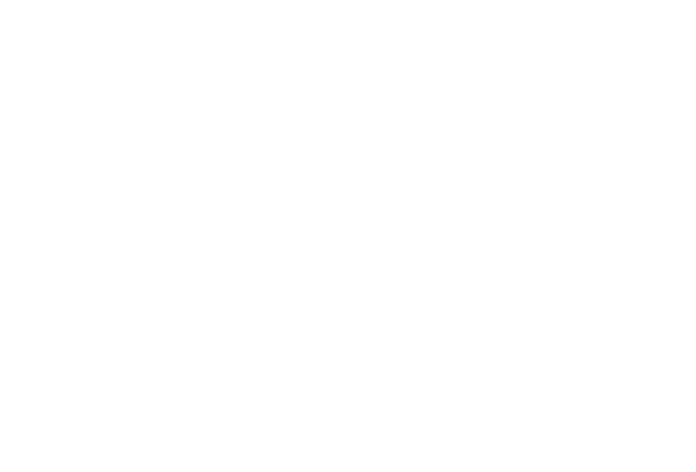

0


Error in <TGraph2D::Paint>: Empty TGraph2D


In [9]:
spacepointsgr[3]->Draw();
c1.Draw();
std::cout << spacepointsgr[0]->GetN() << std::endl;
//double x,y,z;
//spacepointsgr[0]->GetPoint(0,&x,&y,&z);
//std::cout << x << ", " << y << ", " << z << std::endl;

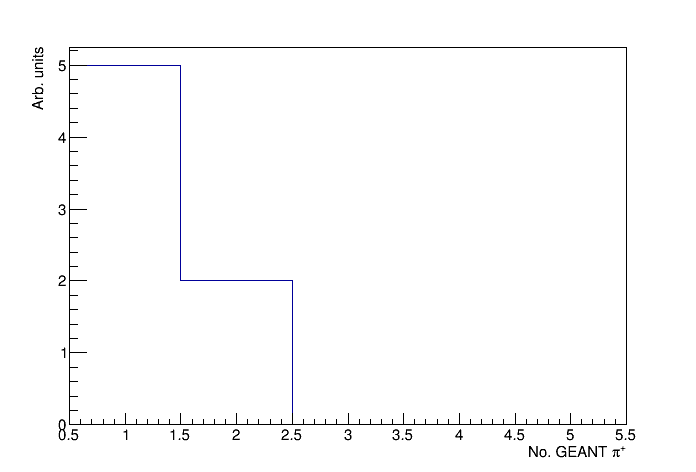

In [10]:
// --- 1D --- //
//   No true pi+ in logical pion
h_nTruePiPlus->Draw();
c1.Draw();

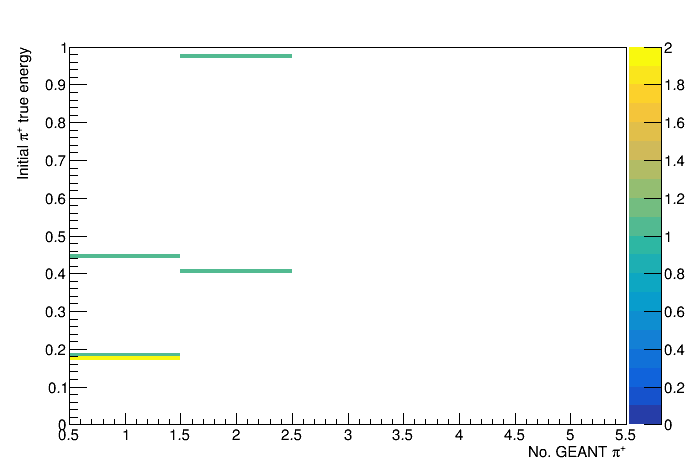

In [11]:
h_nTruePiPlus_vstrueE->Draw("colz");
c1.Draw();

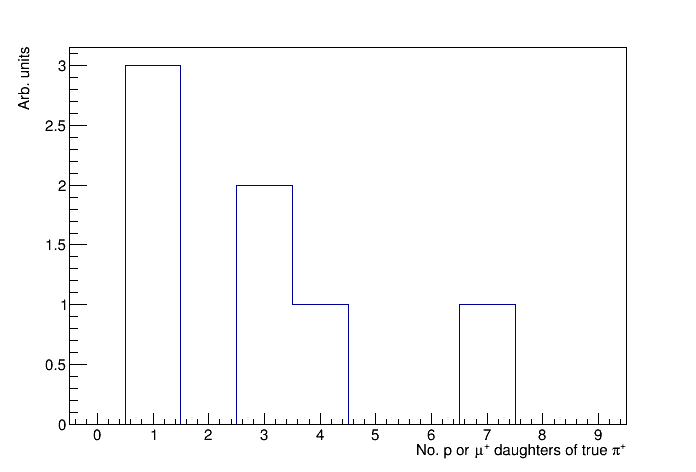

In [12]:
//   No mu+ or p daughters of logical pion
h_nTruePiPlusmuDaughters->Draw();
c1.Draw();

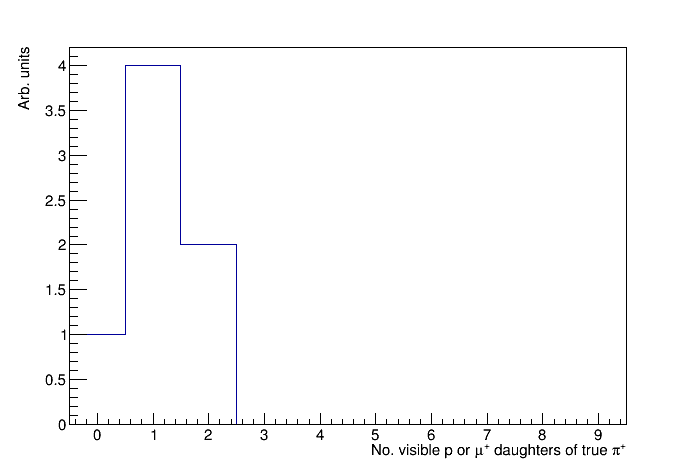

In [13]:
//   No visible mu+ (what threshold) or p (trueP>300MeV) daughters of logical pion (what threshold?)
h_nVisPiPlusmuDaughters->Draw();
c1.Draw();

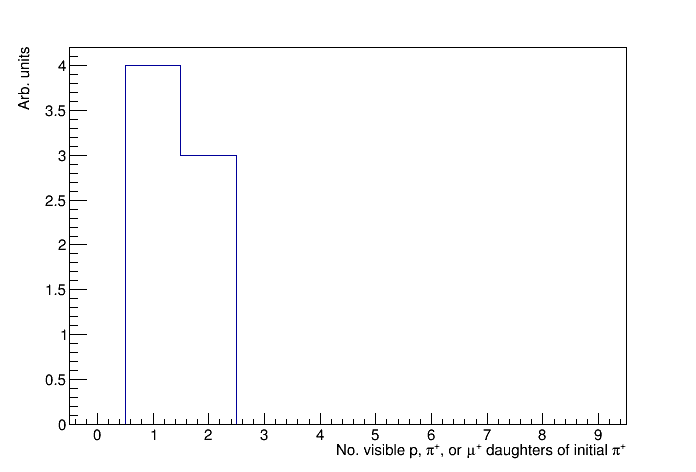

In [14]:
h_nVisPiPlusmuppiDaughters->Draw();
c1.Draw();

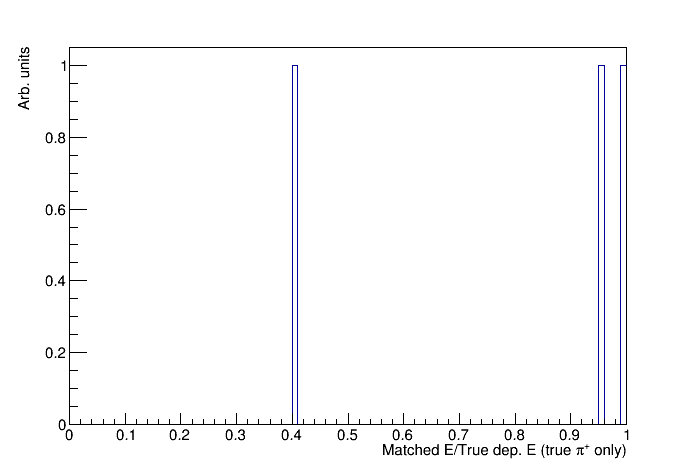

In [15]:
//   pi+ frac matched E
h_PiPlus_matchedEoverdepE->Draw();
c1.Draw();

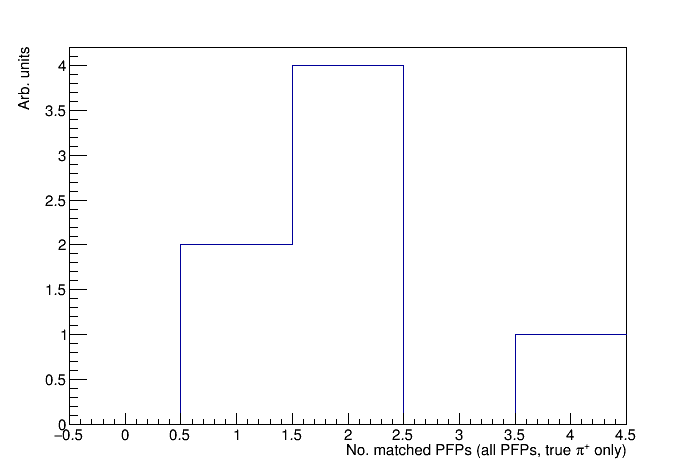

In [16]:
//   pi+ n matched PFPs
h_PiPlus_nmatchedPFPs->Draw();
c1.Draw();

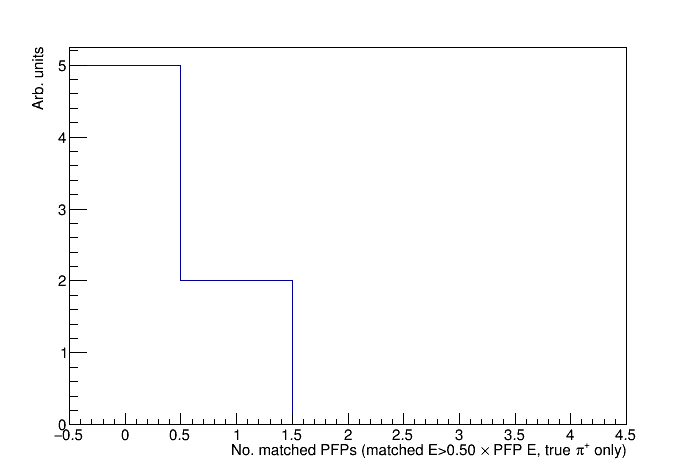

In [17]:
//   pi+ n matched PFPs with matched E threshold
h_PiPlus_nmatchedPFPs_thresh->Draw();
c1.Draw();

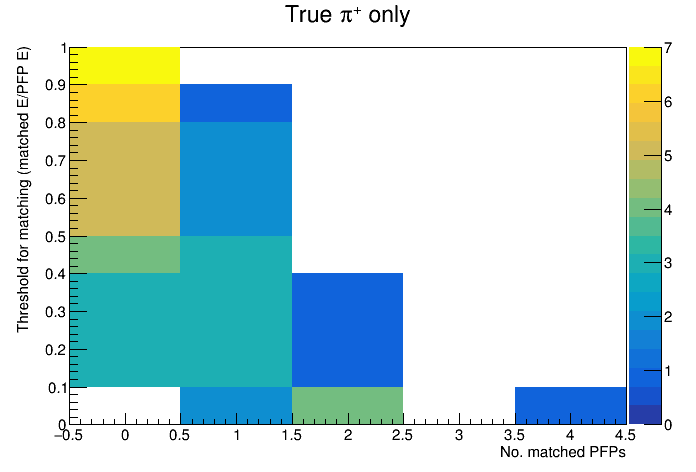

In [18]:
//   pi+ n matched PFPs vs matched E threshold (2D)
h_PiPlus_nmatchedPFPs_thresh_2D->Draw("colz");
c1.Draw();

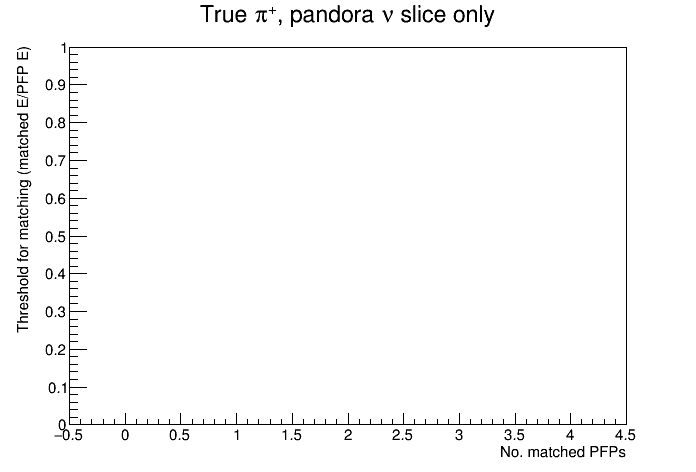

In [19]:
h_PiPlus_nmatchedPFPs_thresh_2D_nuslc->Draw("colz");
c1.Draw();

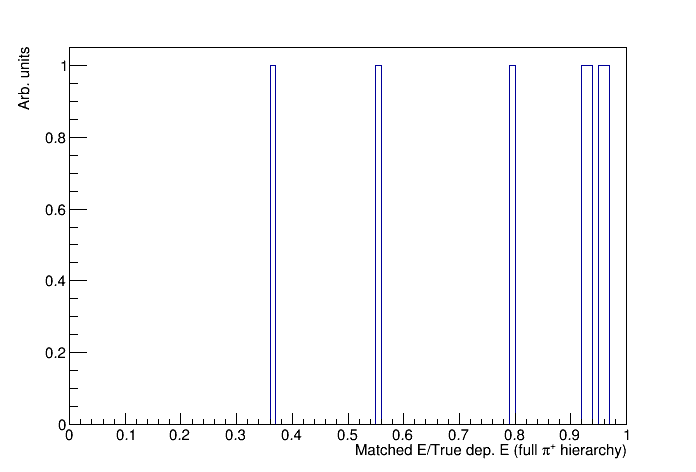

In [20]:
//   hierarchy frac matched E
h_hier_matchedEoverdepE->Draw();
c1.Draw();

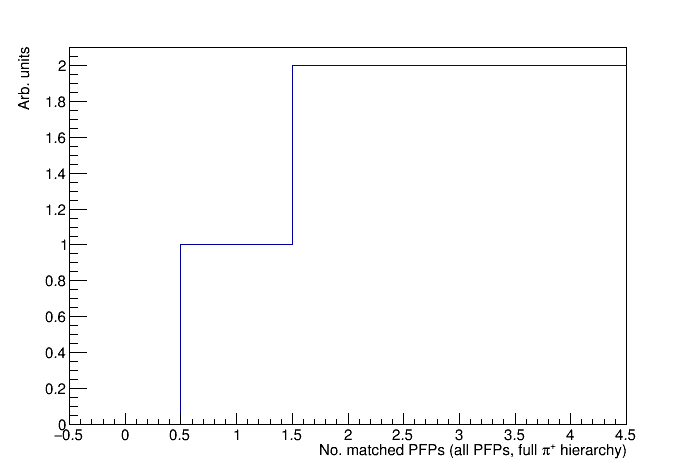

In [21]:
//   hierarchy n matched PFPs
h_hier_nmatchedPFPs->Draw();
c1.Draw();

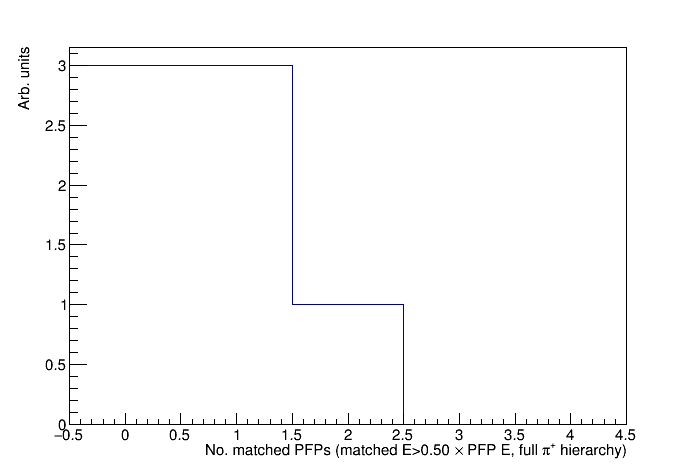

In [22]:
//   hierarchy n matched PFPs with matched E threshold
h_hier_nmatchedPFPs_thresh->Draw();
c1.Draw();

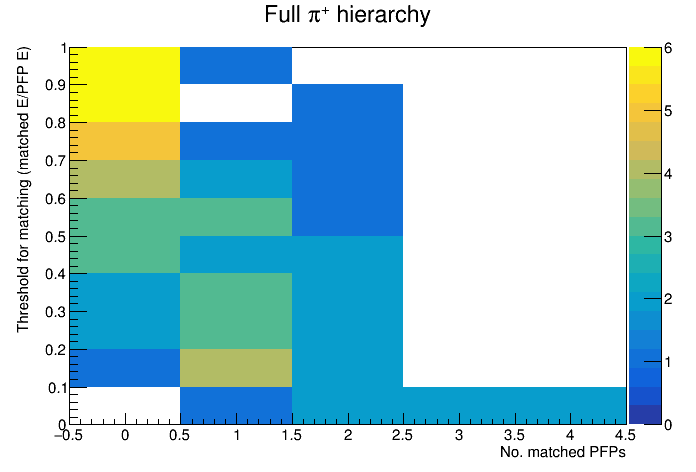

In [23]:
//   hierarchy n matched PFPs vs matched E threshold (2D)
h_hier_nmatchedPFPs_thresh_2D->Draw("colz");
c1.Draw();

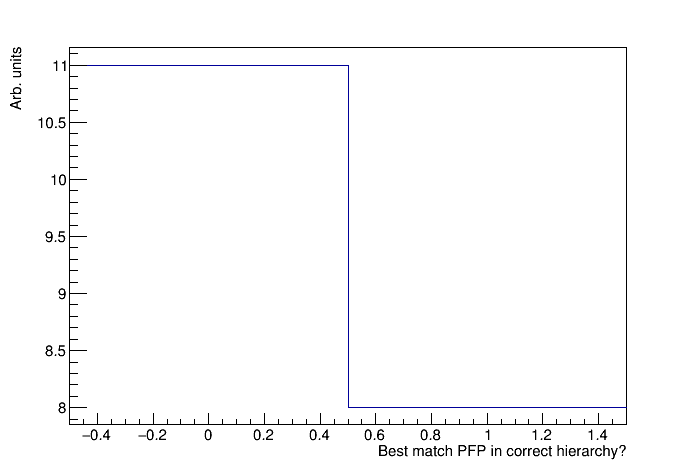

In [24]:
//   hierarchy best match PFP is in Hierarchy
h_hier_goodmatch->Draw();
c1.Draw();

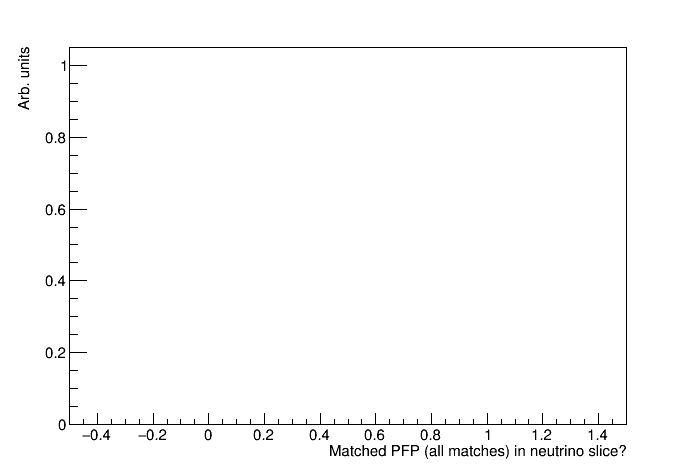

In [25]:
//   hierarchy best match PFP is in Hierarchy
h_hier_PFPinnuslice->Draw();
c1.Draw();

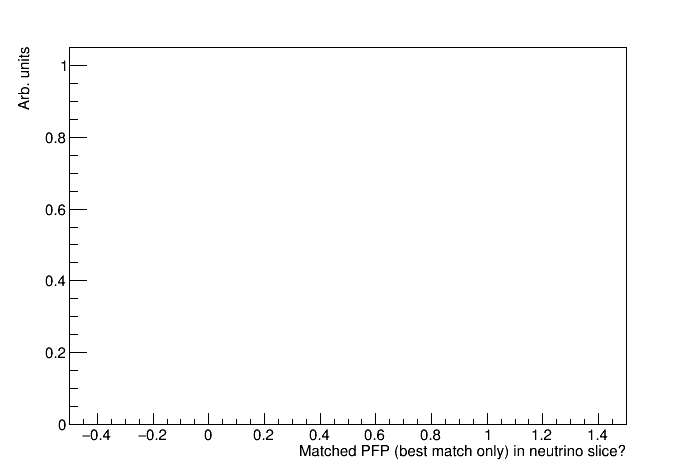

In [26]:
//   hierarchy best match PFP is in Hierarchy
h_hier_PFPinnuslice_bestmatch->Draw();
c1.Draw();

In [27]:
//   hierarchy best match PDG for PFPs not in hierarchy
//h_hier_badmatch_pdgs->Draw();
//c1.Draw();

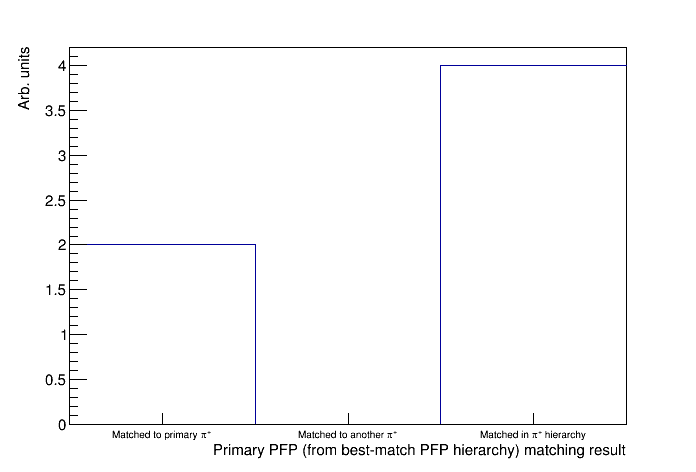

In [28]:
//   Whether primary pi+ matched to primary PFP, or primary PFP matched elsewhere in chain, or not matched
h_primarymatchinginfo->Draw();
c1.Draw();

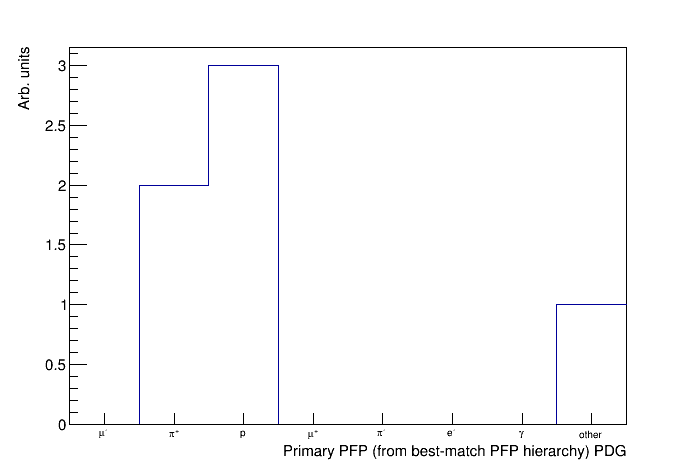

In [29]:
//   PDG of primary PFP matched to chain
h_primaryPFP_pdg->Draw();
c1.Draw();

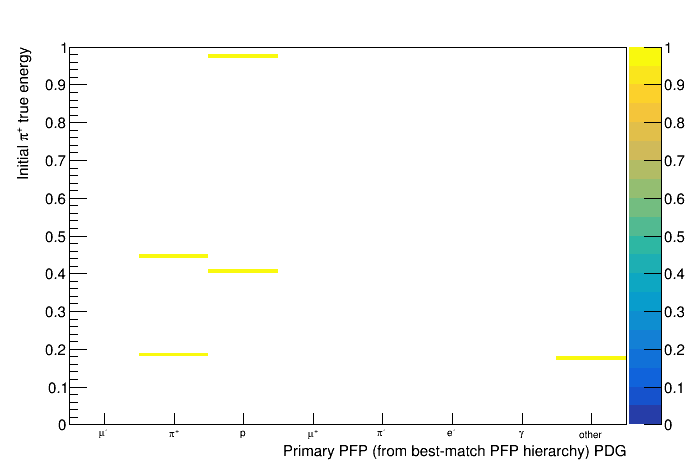

In [30]:
h_primaryPFP_pdg_vstrueE->Draw("colz");
c1.Draw();  

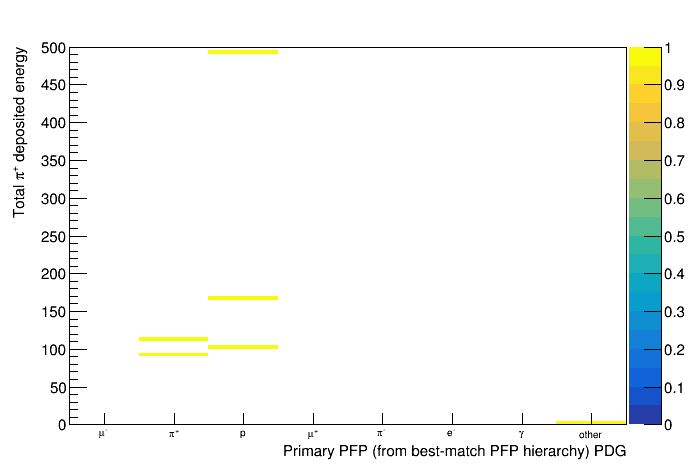

In [31]:
h_primaryPFP_pdg_vsdepE->Draw("colz");
c1.Draw();

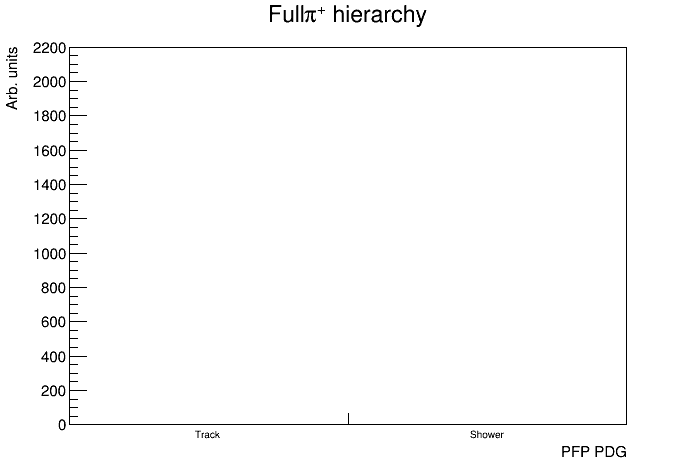

In [32]:
//   Track/shower PDG of primary PFP matched to chain
h_hier_primaryPFP_PFPtrackshower->GetYaxis()->SetRangeUser(0,2200);
h_hier_primaryPFP_PFPtrackshower->Draw();
c1.Draw();

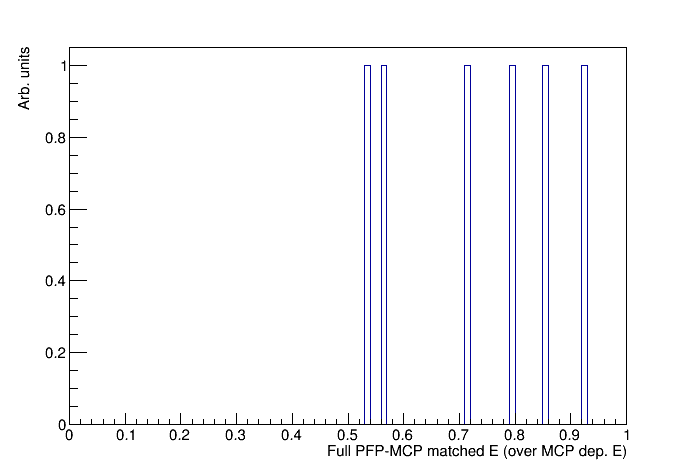

In [33]:
//   Total matched energy of PFP hierarchy (from primary PFP) and MCP hierarchy frac MCP hierarchy energy
h_hiermatchE_overMCP->Draw();
c1.Draw();

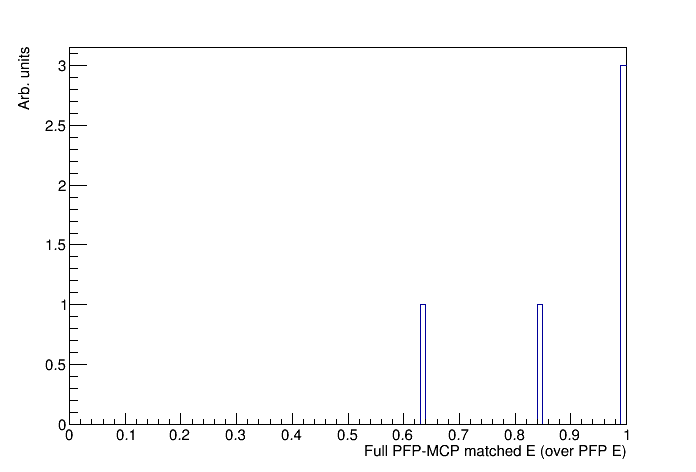

In [34]:
//   Total matched energy of PFP hierarchy (from primary PFP) and MCP hierarchy frac PFP hierarchy energy
h_hiermatchE_overPFP->Draw();
c1.Draw();

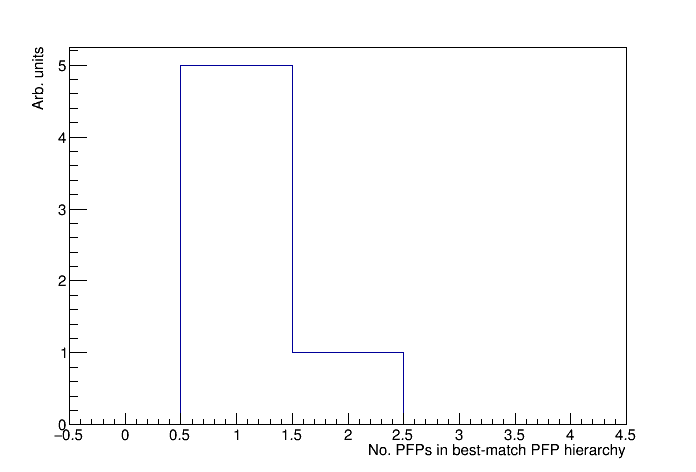

In [35]:
//   No PFPs in PFP hierarchy
h_nPFPs_PFPhier->Draw();
c1.Draw();

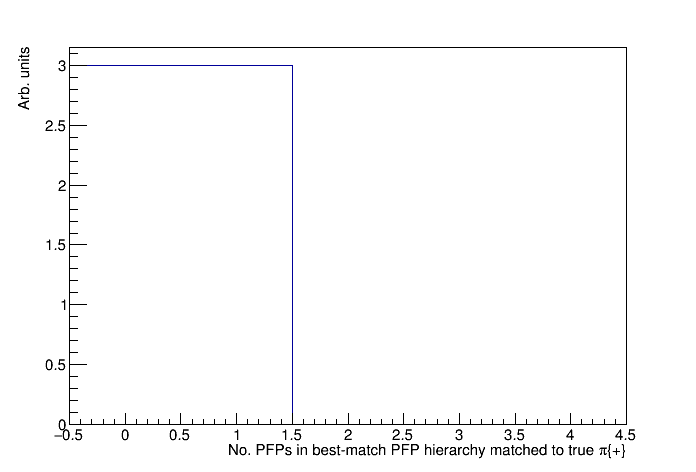

In [36]:
//   No PFPs truth-matched to pi+ in PFP hierarchy
h_nPFPs_PFPhier_piplus->Draw();
c1.Draw();

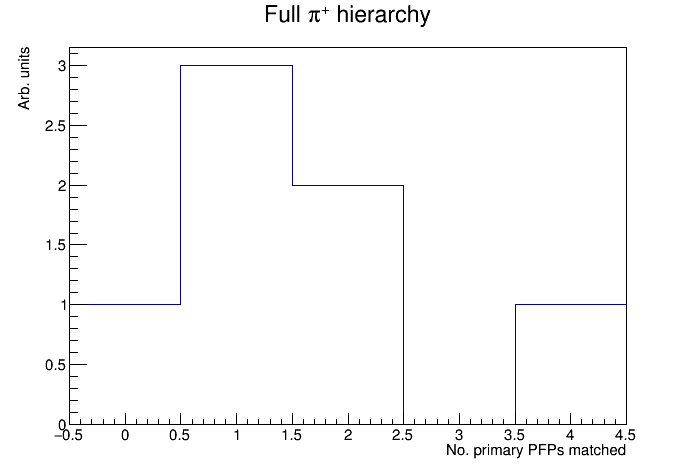

In [37]:
//   No primary PFPs matched to this pi+ hierarchy
h_nprimaryPFPmatch->Draw();
c1.Draw();

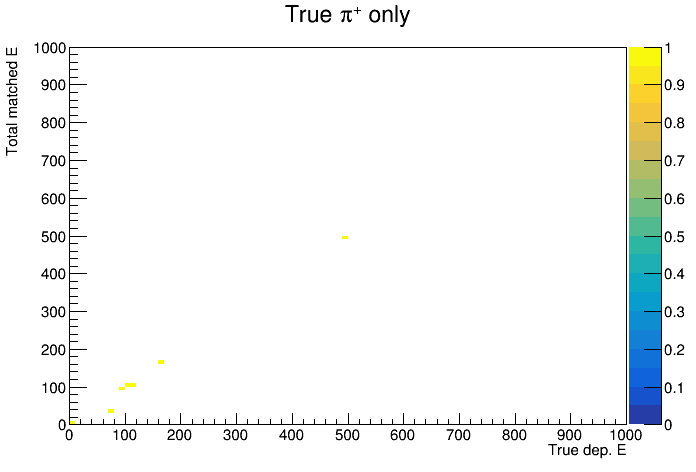

In [38]:
// --- 2D --- //
//   pi+ frac matched E vs total dep E
h_PiPlus_matchedE_vs_depE->Draw("colz");
c1.Draw();

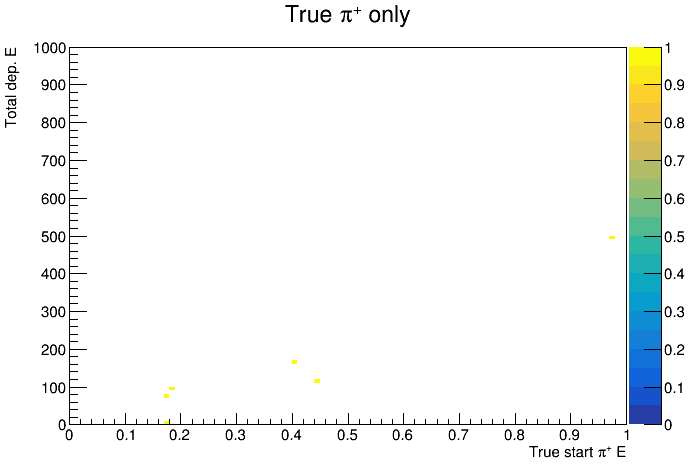

In [39]:
h_PiPlus_depE_vs_trueE->Draw("colz");
c1.Draw();

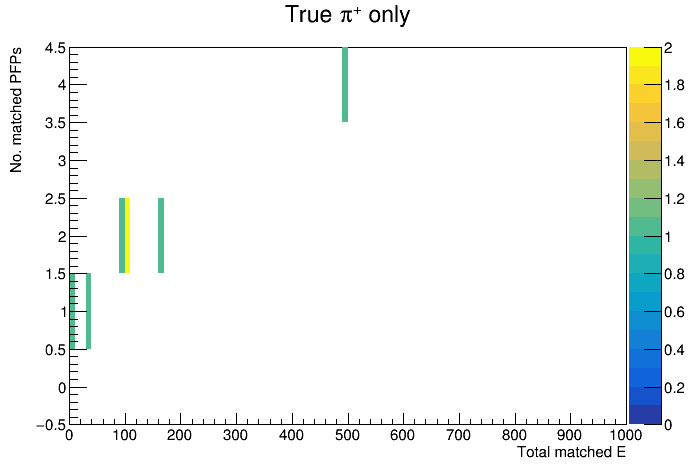

In [40]:
//   pi+ n matched PFPs vs matched E
h_PiPlus_nmatchedPFPs_vs_matchedE->Draw("colz");
c1.Draw();

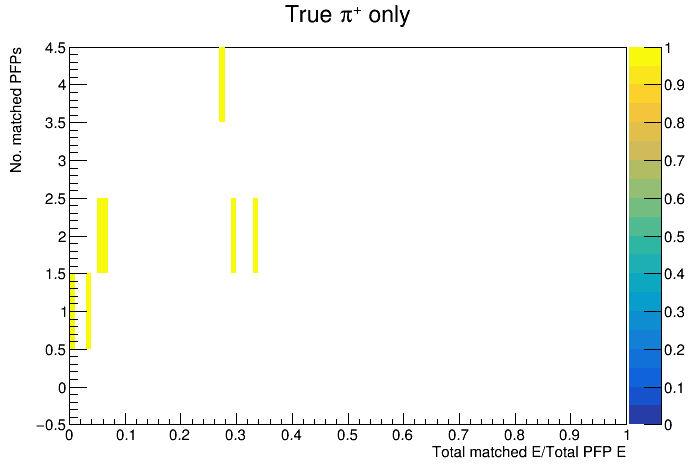

In [41]:
//   pi+ n matched PFPs vs matched E/PFP E
h_PiPlus_nmatchedPFPs_vs_matchedEfracPFP->Draw("colz");
c1.Draw();

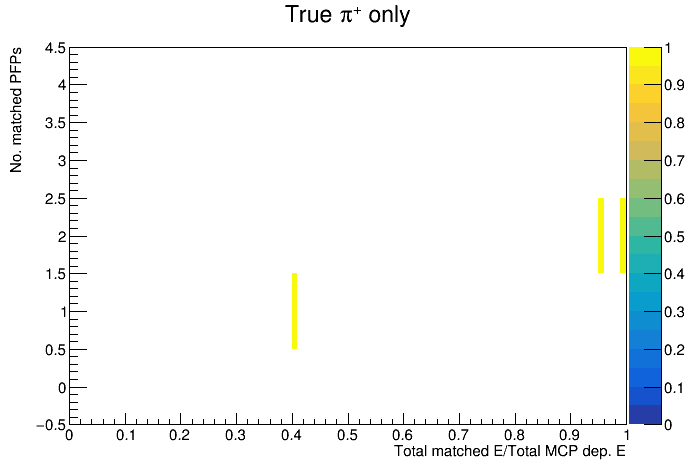

In [42]:
//   pi+ n matched PFPs vs matched E/MCP dep E
h_PiPlus_nmatchedPFPs_vs_matchedEfracMCP->Draw("colz");
c1.Draw();

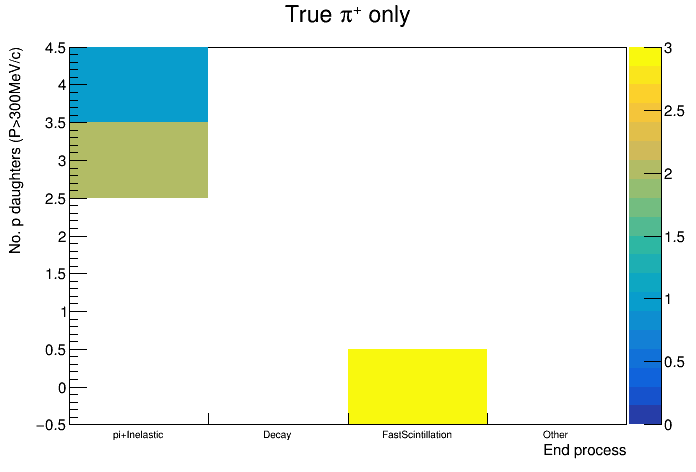

In [43]:
//   pi+ end process vs n proton daughters
h_PiPlus_endproc_vs_np->Draw("colz");
c1.Draw();

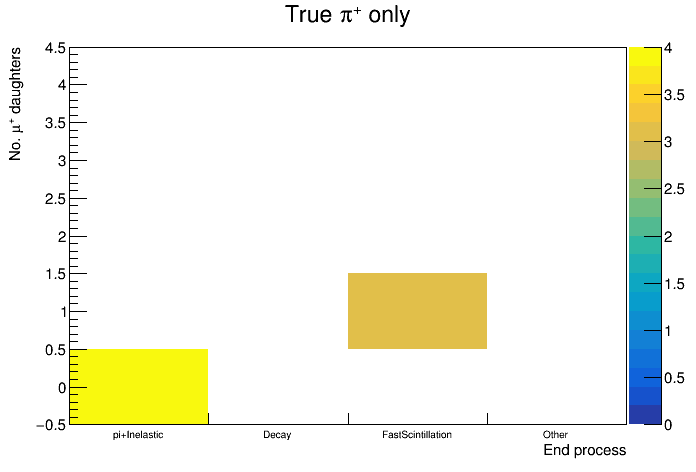

In [44]:
//   pi+ end process vs n mu+ daughters
h_PiPlus_endproc_vs_nmu->Draw("colz");
c1.Draw();

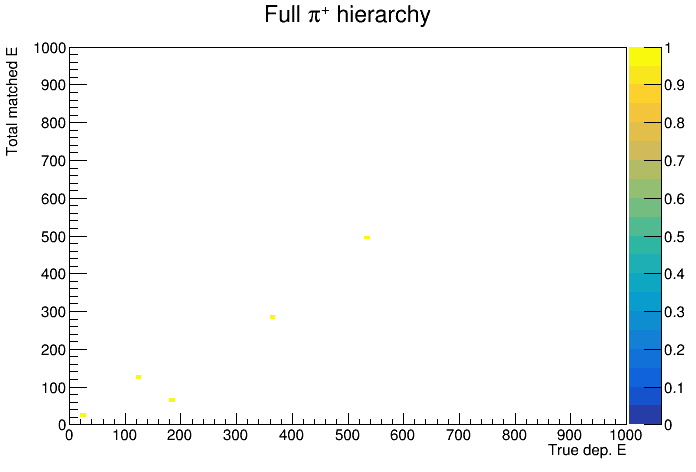

In [45]:
//   hierarchy frac matched E vs total dep E
h_hier_matchedE_vs_depE->Draw("colz");
c1.Draw();

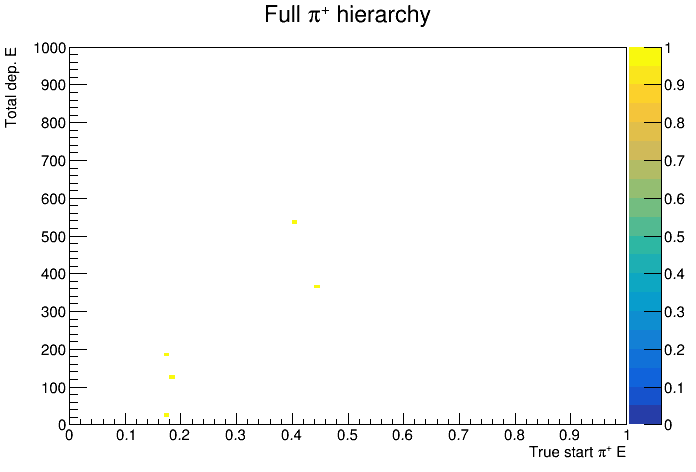

In [46]:
h_hier_depE_vs_trueE->Draw("colz");
c1.Draw();

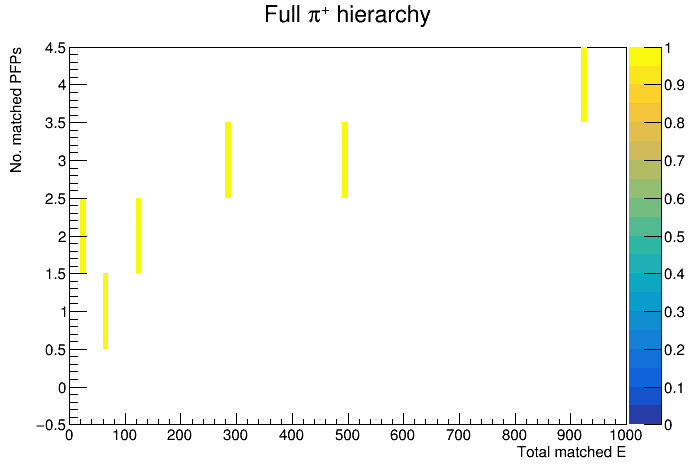

In [47]:
//   hierarchy n matched PFPs vs matched E
h_hier_nmatchedPFPs_vs_matchedE->Draw("colz");
c1.Draw();

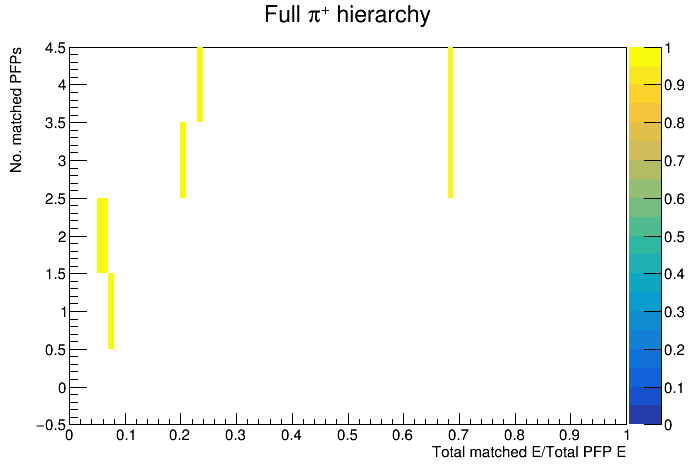

In [48]:
//   hierarchy n matched PFPs vs matched E/PFP E
h_hier_nmatchedPFPs_vs_matchedEfracPFP->Draw("colz");
c1.Draw();

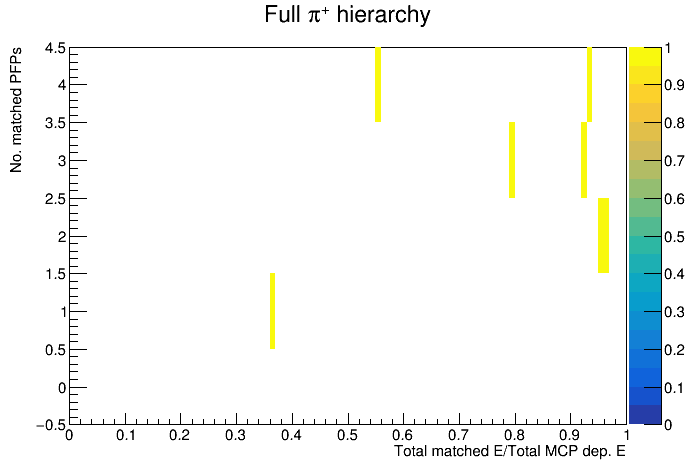

In [49]:
//   hierarchy n matched PFPs vs matched E/MCP dep E
h_hier_nmatchedPFPs_vs_matchedEfracMCP->Draw("colz");
c1.Draw();

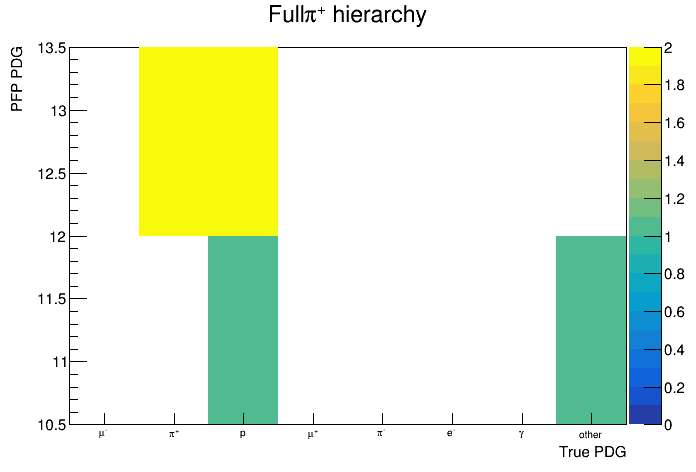

In [50]:
//   hierarchy matched PFP PDG vs matched PFP track/shower
h_hier_PFPPDG_vs_PFPtrackshower->Draw("colz");
c1.Draw();

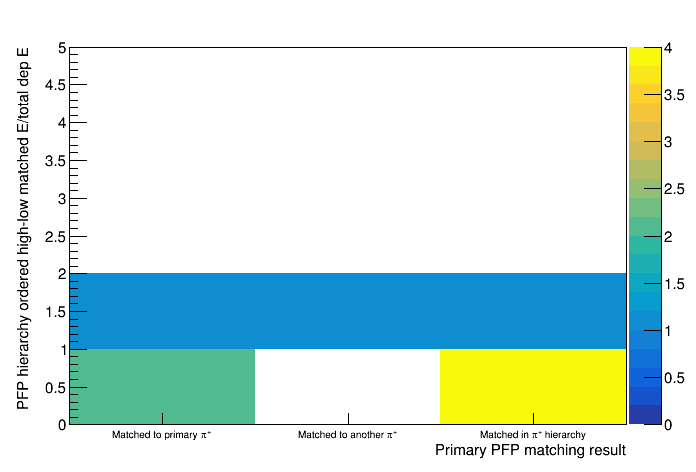

In [51]:

h_primarymatchinginfo_2D->Draw("colz");
c1.Draw();

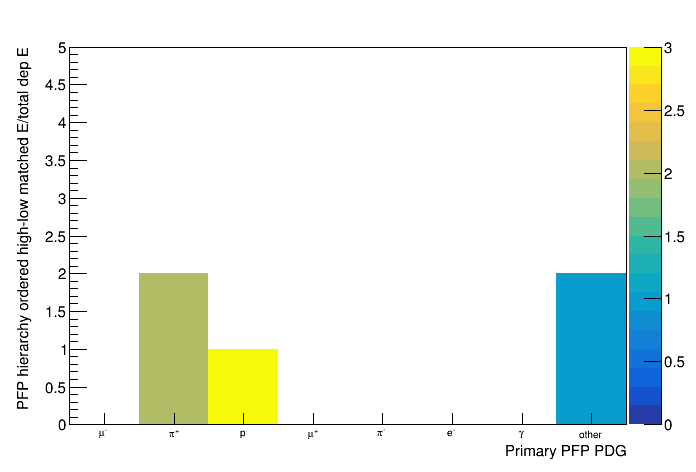

In [52]:
h_primaryPFP_pdg_2D->Draw("colz");
c1.Draw();

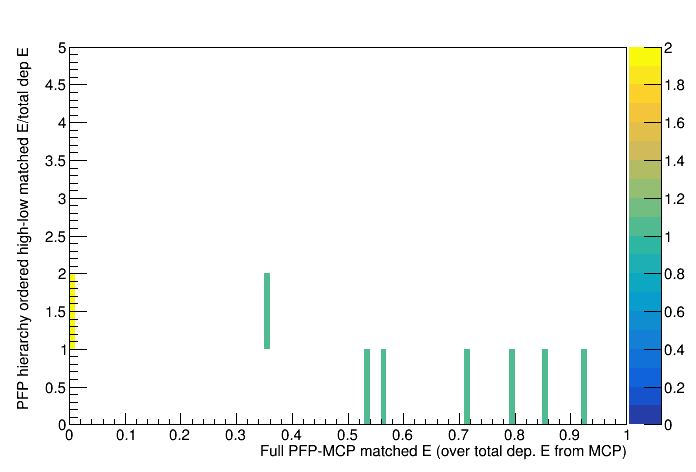

In [53]:
h_hiermatchE_overMCP_2D->Draw("colz");
c1.Draw();

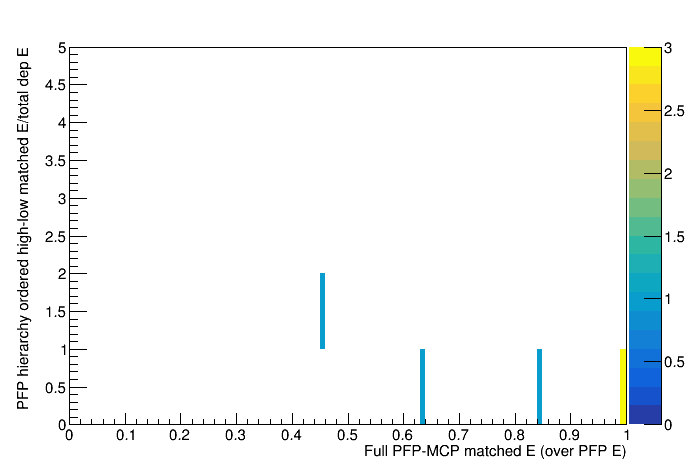

In [54]:
h_hiermatchE_overPFP_2D->Draw("colz");
c1.Draw();

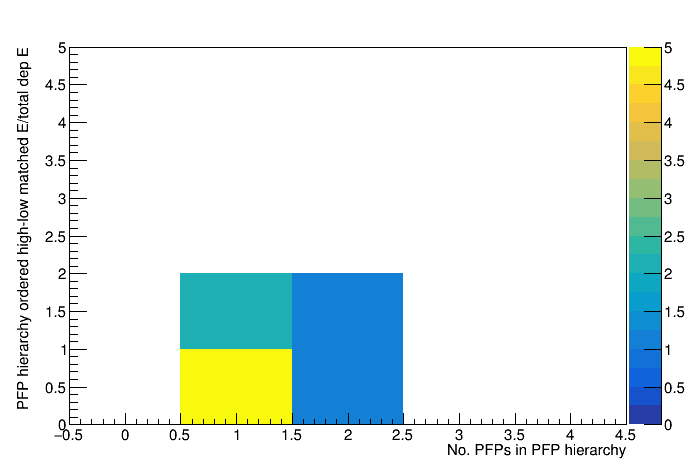

In [55]:
h_nPFPs_PFPhier_2D->Draw("colz");
c1.Draw();

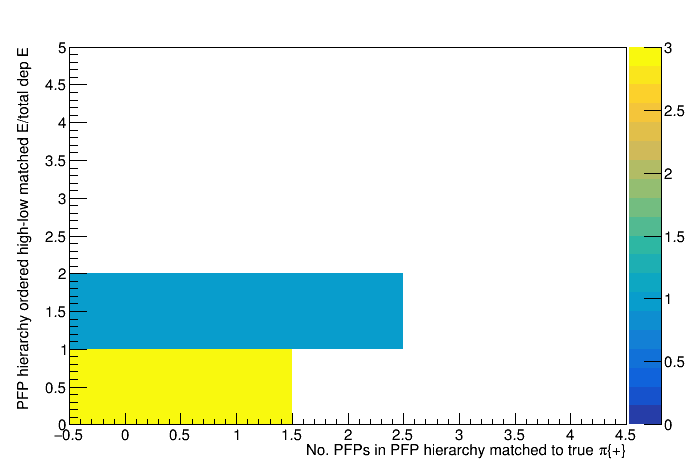

In [56]:
h_nPFPs_PFPhier_piplus_2D->Draw("colz");
c1.Draw();

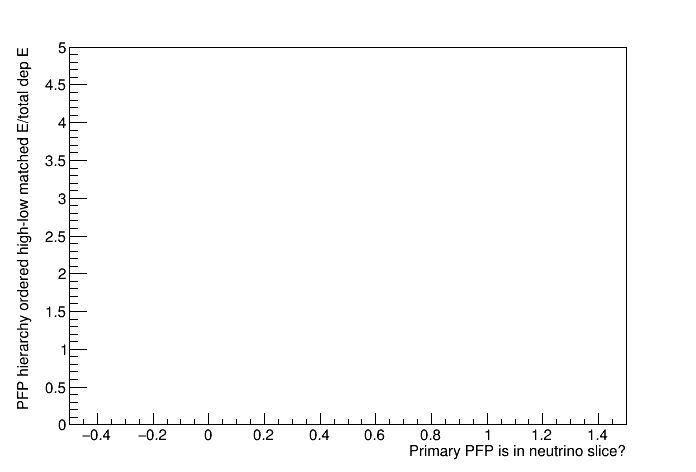

In [57]:
h_primaryPFP_isinnuslice_2D->Draw("colz");
c1.Draw();

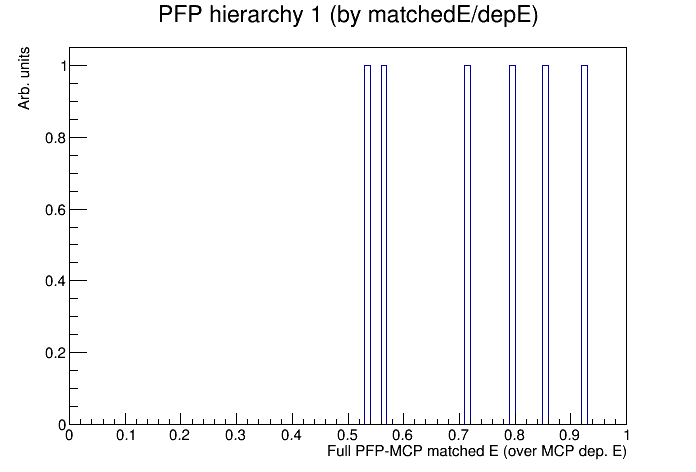

In [58]:
h_hiermatchE_overMCP_perprimary[0]->Draw();
c1.Draw();

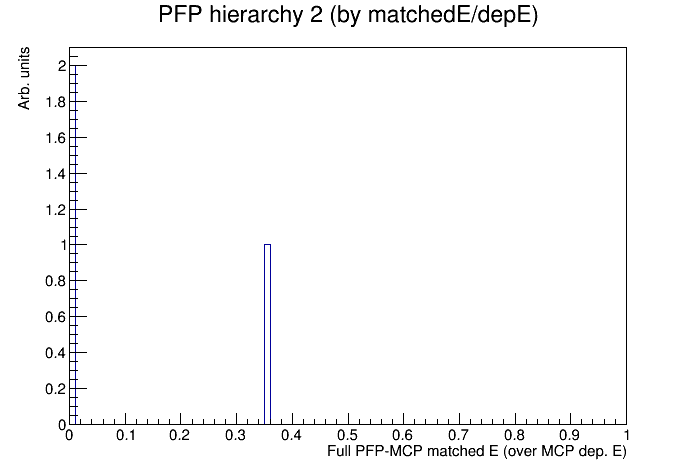

In [59]:
h_hiermatchE_overMCP_perprimary[1]->Draw();
c1.Draw();

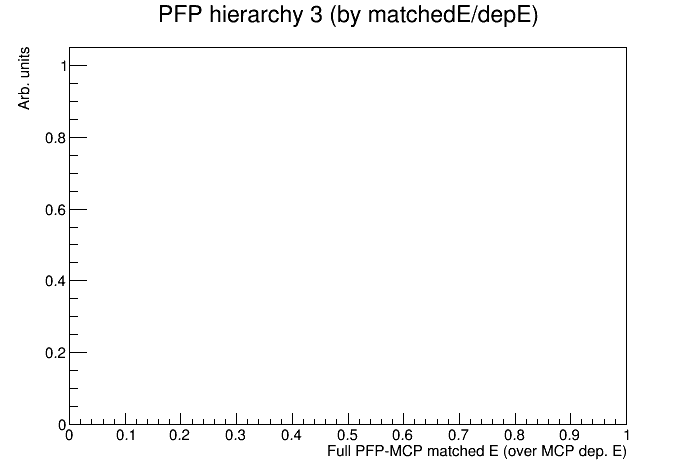

In [60]:
h_hiermatchE_overMCP_perprimary[2]->Draw();
c1.Draw();

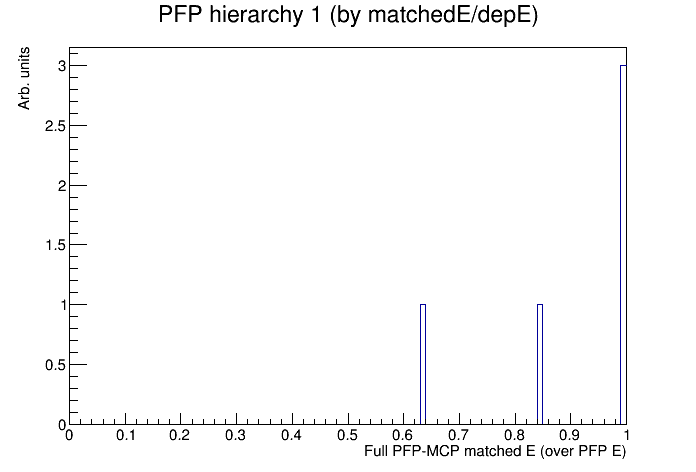

In [61]:
h_hiermatchE_overPFP_perprimary[0]->Draw();
c1.Draw();

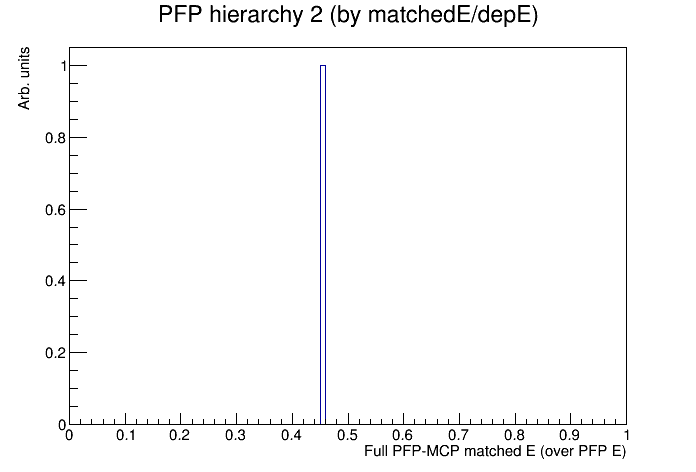

In [62]:
h_hiermatchE_overPFP_perprimary[1]->Draw();
c1.Draw();

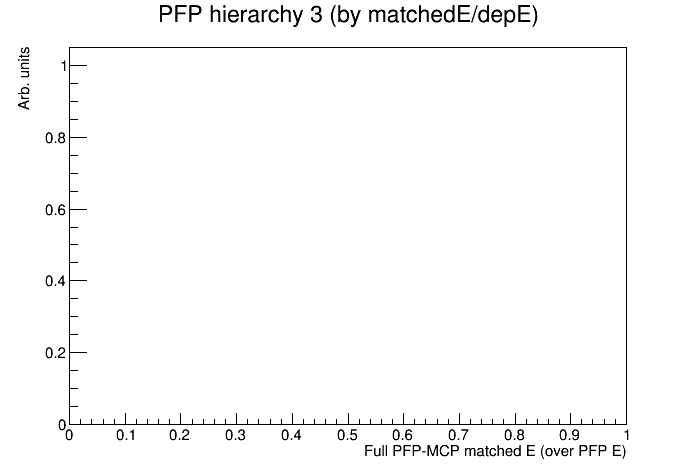

In [63]:
h_hiermatchE_overPFP_perprimary[2]->Draw();
c1.Draw();